# Анализ оттока клиентов банка «Метанпромбанк»

**Цель исследования:** Выделить сегменты клиентов, склонных к оттоку, на основании данных об их активности и состоянию.

**Задачи исследования:**
- Провести исследовательский анализ данных
- Определить портреты клиентов, которые склонны уходить в отток
- Сформулировать и проверить три статистические гипотезы
- Провести сегментацию клиентов
- Дать рекомендации по работе с клиентами, склонными к оттоку

**Содержание:**
* 1. Знакомство с датасетом. Первый взгляд на данные
* 2. Предобработка данных
    * 2.1. Кодировка категориальных переменных
    * 2.2. Приведение названий колонок к единому стилю
    * 2.3. Анализ и обработка пропущенных значений
    * 2.4. Проверка корректности типов данных
    * 2.5. Обработка дубликатов
* 3. Исследовательский анализ данных
    * 3.1. Построение распределений по показателям
    * 3.2. Поиск взаимосвязей. Корреляционный анализ данных
    * 3.3. Составление портретов клиентов
* 4. Проверка статистических гипотез
    * 4.1 Гипотеза №1. Доходы клиентов, уходящих в отток, и клиентов, остающихся в банке, различаются
    * 4.2  Гипотеза №2. Количество банковских продуктов у клиентов оттока и действующих клиентов совпадает
    * 4.3  Гипотеза №3. Количество баллов собственности у клиентов оттока и действующих клиентов совпадает
* 5. Сегментация клиентов
    * 5.1 Определение сегментов на основе стратегических показателей
    * 5.2 Приоритизация сегментов
* 6. Общие выводы


## Знакомство с датасетом. Первый взгляд на данные

Импортируем все необходимые для исследования библиотеки.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

Сохраним датасет в переменную `data`. Ознакомимся с общей информацией о данных.

In [2]:
path = 'https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F'
data = pd.read_csv (path)
data.info()
display (data.sample (5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
3570,182804,914.0,Ярославль,Ж,30.0,0,NaN,1,1,1,195965.04,0
5149,174515,667.0,Рыбинск,М,47.0,0,NaN,1,1,1,173340.27,0
4616,220029,852.0,Ярославль,М,37.0,5,326643.49,2,0,0,47061.58,1
6831,127477,853.0,Ярославль,М,33.0,1,213544.91,2,1,0,102867.73,0
605,216942,879.0,Ростов,М,57.0,5,1292963.92,1,0,0,98793.92,0


**Описание датасета:**

- `user_id` — идентификатор пользователя
- `score` — баллы кредитного скоринга
- `city` — город
- `gender` — пол
- `age` — возраст 
- `equity`  — количество баллов собственности
- `balance` — баланс на счёте
- `products` — количество продуктов, которыми пользуется клиент
- `credit_card` — есть ли кредитная карта
- `last_activity` — активный клиент
- `est_salary` — заработная плата клиента
- `churn` — ушёл или нет.

Датасет состоит из 10000 записей об активности и состоянии клиентов банка. Имеются пропуски данных в столбцах `age` и `balance`. Тип данных в колонках `score` и `age` необходимо заменить на `int`. Также следует закодировать колонки `city` и `gender` для дальнейшего исследования. Названия всех колонок следует привести к единому стилю.

Перейдём к предобработке данных.

## Предобработка данных
### Кодировка категориальных переменных

Закодируем данные колонок `city` и `age` с помощью `get_dummies`, сохранив при этом оригинальные столбцы.

In [3]:
data ['city_orig'] = data ['city']
data ['gender_orig'] = data ['gender']
data = pd.get_dummies (data, columns = ['city', 'gender'], )
data.head()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,city_orig,gender_orig,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж,0,1,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж,0,1,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж,0,1,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж,0,0,1,1,0
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,Ярославль,М,0,0,1,0,1


### Приведение названий колонок к единому стилю

Приведём названия всех колонок в ниженму регистру. Колонку `userid` переименуем в `user_id` для удобства.

In [4]:
data.columns = data.columns.str.lower()
data.rename (columns = {'userid' : 'user_id'}, inplace = True)
data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_orig,gender_orig,city_ростов,city_рыбинск,city_ярославль,gender_ж,gender_м
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж,0,1,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж,0,1,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж,0,1,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж,0,0,1,1,0
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,Ярославль,М,0,0,1,0,1


### Анализ и обработка пропущенных значений

Пропуски данных встречаются в колонках `age` и `balance`. В колонке `age` пропущено 26 записей - это менее 1% от общего объёма данных. От такого количества пропусков можно избавиться без потери качества данных.

In [5]:
data.dropna (subset = ['age'], inplace = True)
print ('Размер датасета после удаления пропусков:', len (data))

Размер датасета после удаления пропусков: 9974


В колонке `balance` пропусков значительно больше: 22,8% от общего объёма данных. Для принятия решения по обработке пропусков в данной колонке, следует выяснить причину их появления.

Посмотрим на взаимосвязь города и отсутствия данных о балансе.

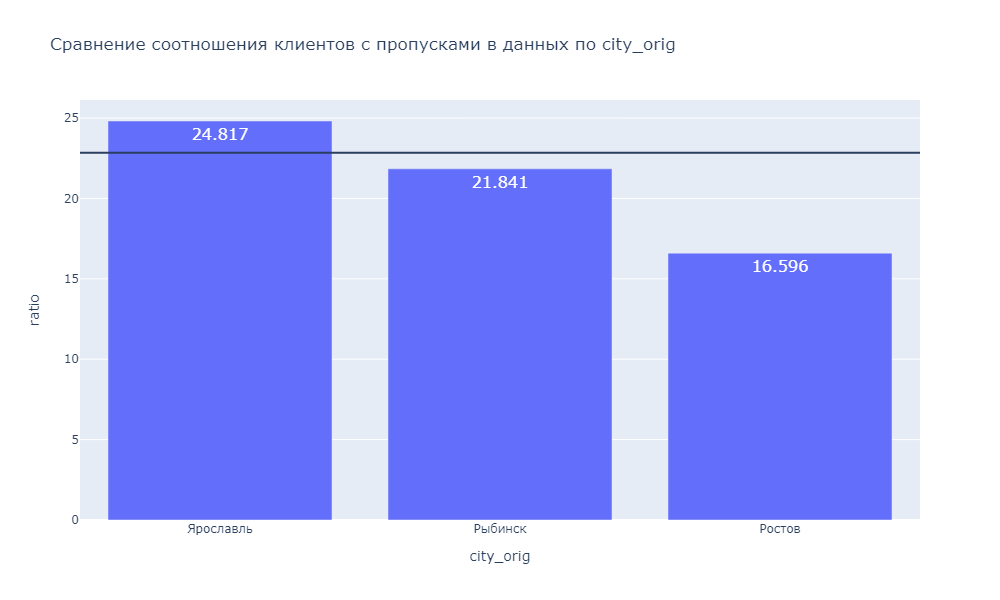

In [6]:
data_na = data [data ['balance'].isna()]
data_drop_na = data.dropna ()

def groupby_show (data_alter, col, title_text):
    
    data_group = data.groupby (col)['user_id'].count().reset_index()
    data_group_alter = data_alter.groupby (col)['user_id'].count().reset_index().rename (columns = {'user_id': 'user_id_alter'})
    data_group = data_group.merge (data_group_alter, on = col)
    data_group ['ratio'] = round ((data_group ['user_id_alter'] / data_group ['user_id']) * 100, 3)

    fig = px.bar (data_group.sort_values (by = 'ratio', ascending = False),
                  x = col,
                  y = 'ratio',
                  text = 'ratio',
                  title = title_text + f'{col}',
                  barmode = 'group',
                  height = 600,
                  width = 1000)
    
    fig.add_hline ((len (data_alter) / len (data)) * 100)
    fig.update_traces (textfont_size = 16)
    fig.show ('png')

groupby_show (data_na, 'city_orig', 'Сравнение соотношения клиентов с пропусками в данных по ')

Соотношение количества клиентов в каждом конректном городе немного различается, но не критично. Прямой корреляции между городом клиента и наличием пропусков в колонке `balance` не наблюдается.

Напишем функцию для сравнения количественных бинарных признаков, таких как `gender_orig`, `credit_card`, `last_activity` и `churn`.

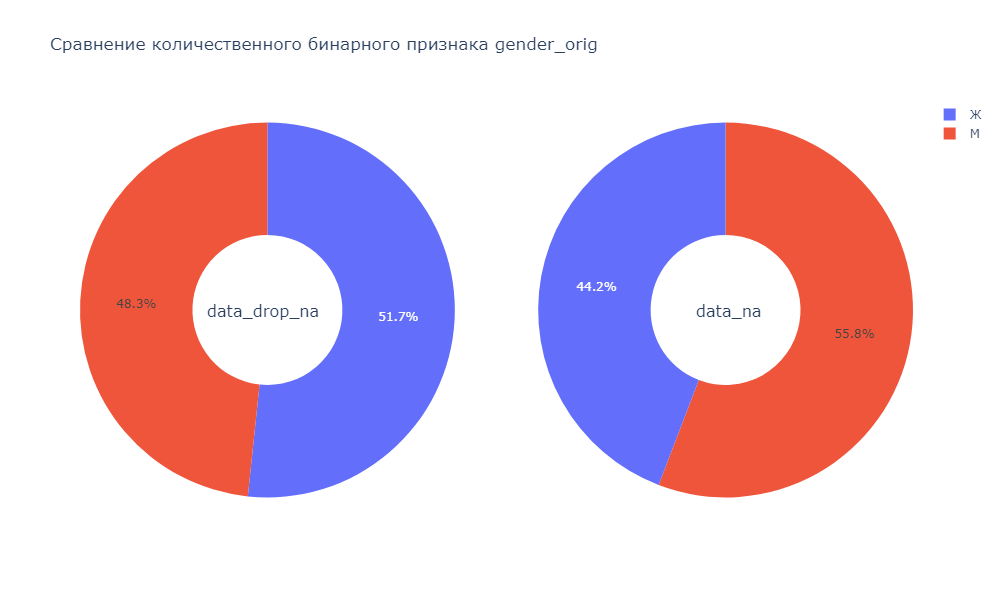

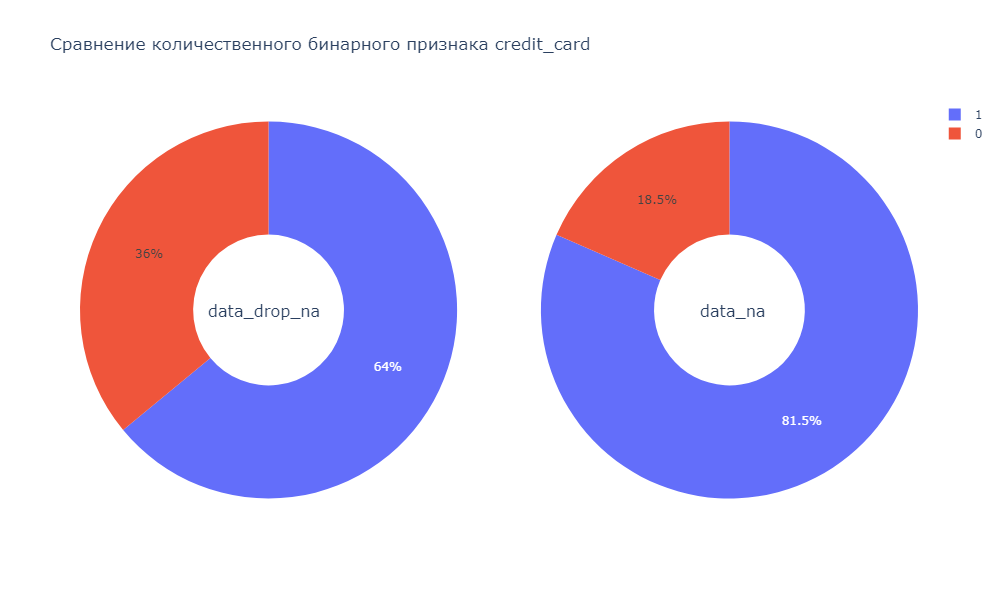

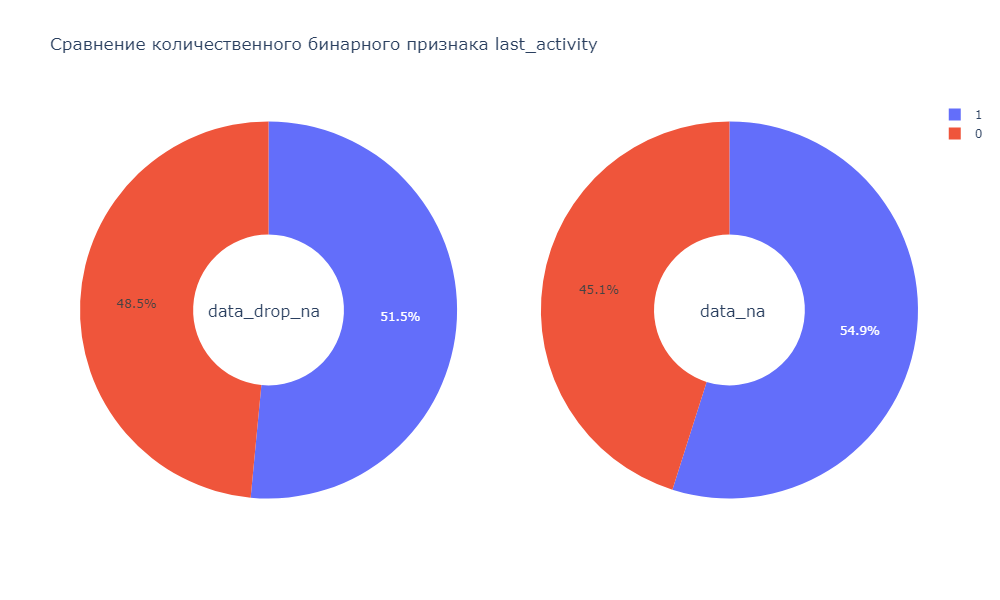

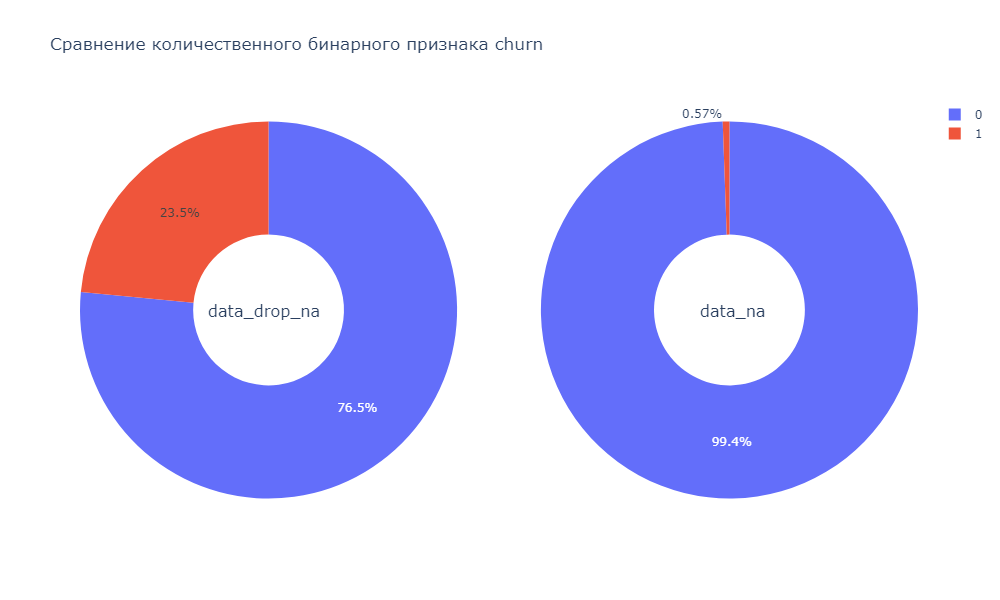

In [7]:
def show_binary_pie (data_1, data_2, column, text_1, text_2):
    
    data_groupby_binary_0 = data_1.groupby (column)['user_id'].count().reset_index()
    data_groupby_binary_1 = data_2.groupby (column)['user_id'].count().reset_index()
    
    fig = make_subplots (rows = 1,
                         cols = 2,
                         specs = [[{'type':'domain'}, {'type':'domain'}]])
    
    for i, j in zip ([data_groupby_binary_0, data_groupby_binary_1], [1, 2]):
        fig.add_trace (go.Pie (labels = i [column].unique(),
                               values = i ['user_id'],
                               hole = .4), 1, j)
    
    fig.update_layout (title_text = f'Сравнение количественного бинарного признака {column}',
                       annotations = [dict (text = text_1, x = 0.15, y = 0.5, font_size = 16, showarrow = False),
                                      dict (text = text_2, x = 0.82, y = 0.5, font_size = 16, showarrow = False)],
                       height = 600,
                       width = 1000)
    
    fig.update_traces (textinfo = 'percent')

    fig.show ('png')
    
for i in ['gender_orig', 'credit_card', 'last_activity', 'churn']:
    show_binary_pie (data_drop_na, data_na, i, 'data_drop_na', 'data_na')

Разница в соотношении между клиентами имеющими кредитную карту составляет 17,5% - довольно большая, но недостаточная для того, чтобы утверждать о прямой взаимосвязи отсутствия пропусков и наличия кредиткной карты.

Практически все клиенты, имеющие пропуски в значении баланса, относятся к кадегории действующих клиентов, т.е. тех, кто не уходит в отток. Можно предлоположить, что это новые клиенты, которые открыли счёт, но ещё не пополнили его. Однако, 22.8% новых клиентов - это слишком большой приток, даже если сред происходил сразу после акции по привлечению новых клиентов. Сам факт того, что клиенты с пропусками в балансе относятся к категории действующих, скорее всего говорит о том, что клиентов этой категории - подавляющее большинство, либо, данные взаимосвязаны через какой-либо третий признак. Заполнять пропуски по среднему или медиане среди всех неооточных клиентов будет некорретно.

Проверим взаимосвязь небинарных количественных показателей (`score`, `age`, `equity`, `products`, `est_salary`) с наличием информации о балансе по средним значениям.

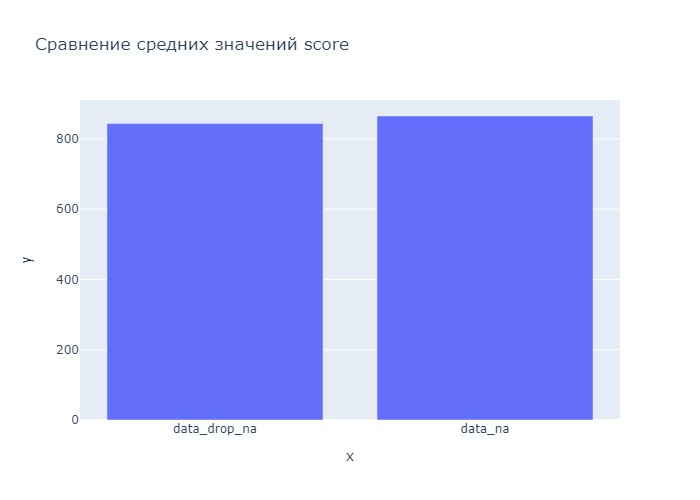

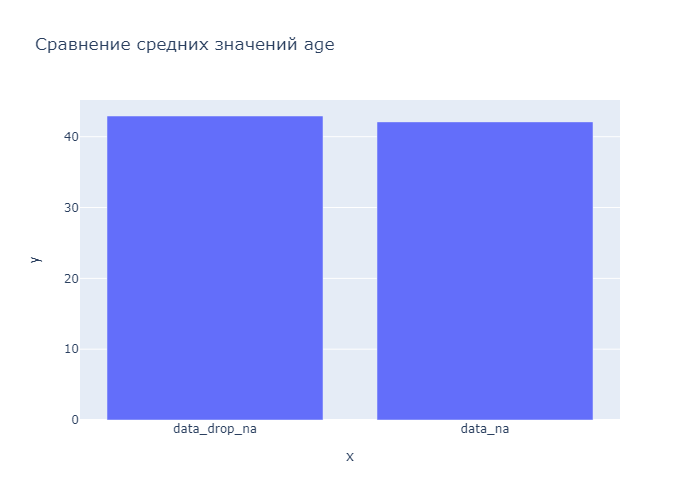

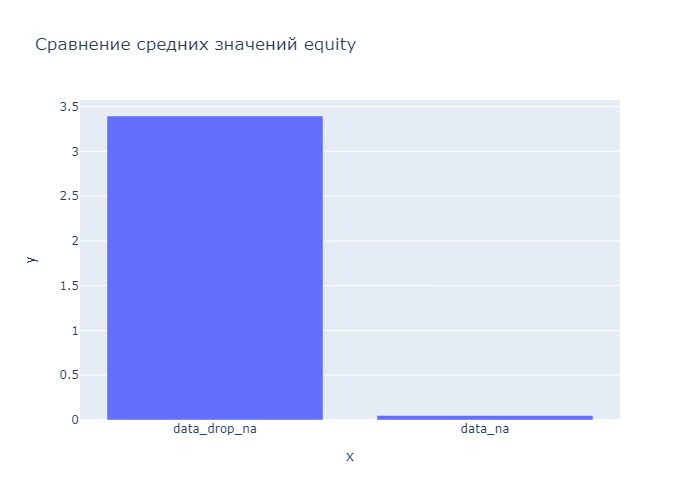

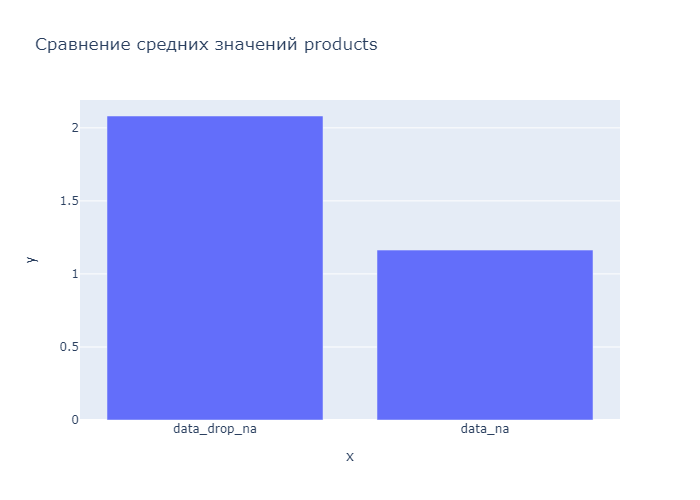

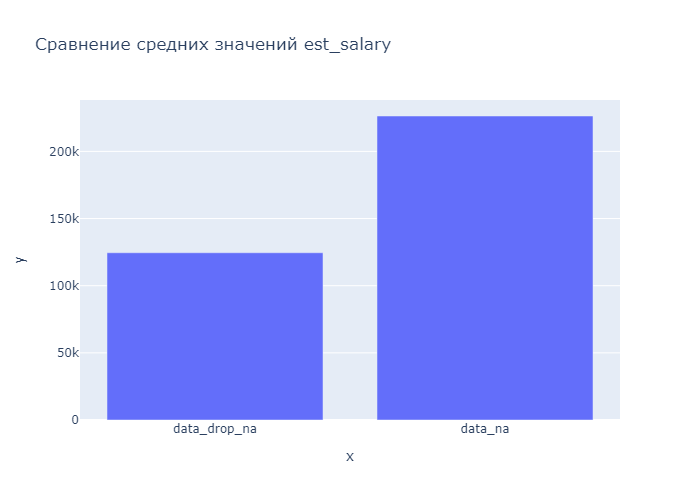

In [8]:
numeric_columns = ['score', 'age', 'equity', 'products', 'est_salary']

for i in numeric_columns:
    y_1 = data_drop_na [i].mean()
    y_2 = data_na [i].mean()
    
    fig = px.bar (x = ['data_drop_na', 'data_na'],
                  y = [y_1, y_2],
                  title = f'Сравнение средних значений {i}')
    fig.show ('png')

Корреляция наличия пропусков с баллами кредитного скоринга, возрастом, наличием кредитных карт и активностью клиента - не наблюдается.

Прослеживаются небольшие различия в количестве продуктов и заработной плате клиентов (у клиентов с пропусками в столбце `balance` в среднем на 1 активный продукт меньше и на 100 тысяч рублей выше зарплата). Также есть большая разница показателе `equity`. У клиентов с пропусками в столбце `balance` среднее количество баллов собственности близко к нулю.

Можно предположить, что баланс клиента на счету коррелирует с его заработной платой. Если это так, то для заполнения пропусков в балансе можно взять среднее или медианное значение тех клиентов, у которых показатель `equity` близок к нулю, а показатель `churn` равен нулю.

Для начала проверим корреляцию баланса клиентов и их заработную плату.

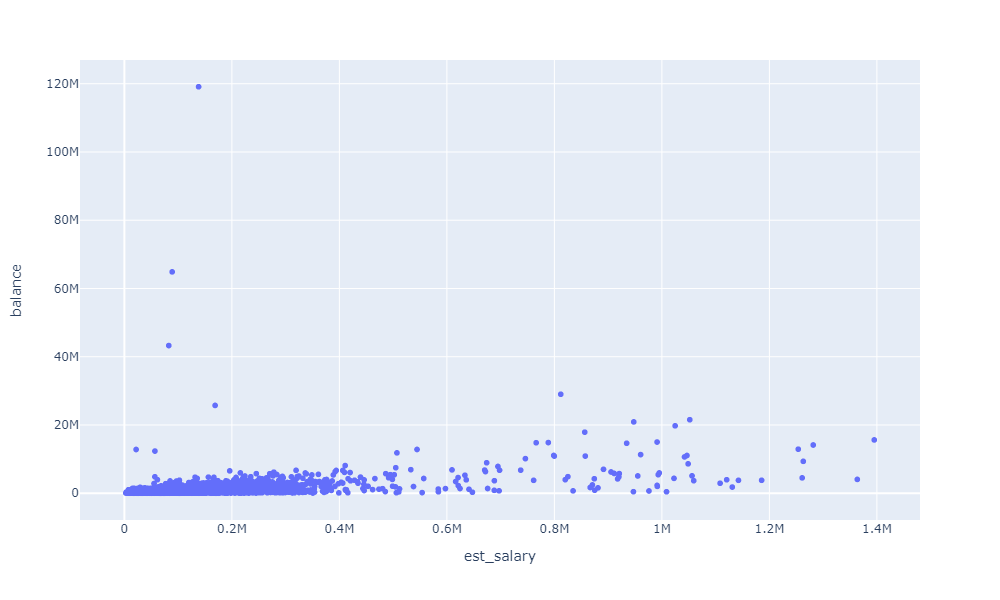

In [9]:
fig = px.scatter (data_drop_na,
                  x = 'est_salary',
                  y = 'balance',
                  height = 600,
                  width = 1000)
fig.show ('png')

Выбросы в значениях мешают определить корреляцию. Урежем значения `balance` до 10 млн.руб, а значения `est_salary` до 500 тыс.руб.

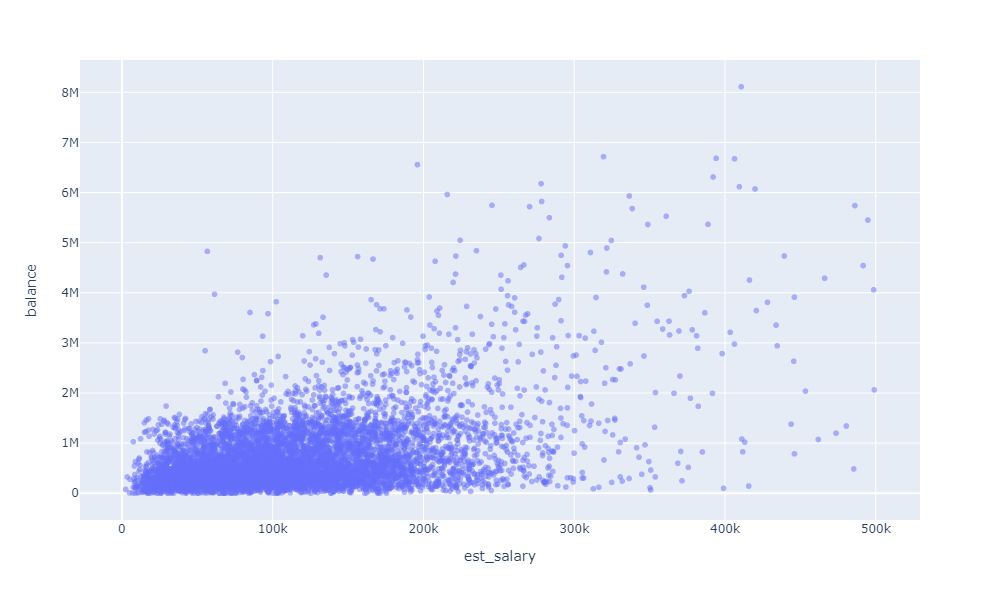

In [10]:
fig = px.scatter (data_drop_na.query ('balance < 10000000 & est_salary < 500000'),
                  x = 'est_salary',
                  y = 'balance',
                  opacity = 0.5,
                  height = 600,
                  width = 1000)
fig.show ('png')

Явной корреляции по графику не неблюдается. Рассчитаем коэффициент Пирсона для более точного результата.

In [11]:
print ('Коэффициент Пирсона:', round (data_drop_na ['est_salary'].corr (data_drop_na ['balance']), 2))

Коэффициент Пирсона: 0.34


**Вывод:** Корреляция между заработной платой и состоянием счёта довольно слабая. На основе такой корреляции заполнять пропуски в столбце `balance` средними или медианными значениями будет некорректно.

Причиной пропусков в данном столбце может быть как отсутствие активных счётов у клиента, так и ошибки при сборе данных для анализа. Также есть вероятность, что наличие пропусков связано с показателями, которые отсутствуют в текущем датасете, и узнать реальную причину их появления невозможно без дополнительной информации.

Во избежание искажения результатов исследования для дальнейшей работы все пропуски в колонке `balance` оставляем без изменений.

### Проверка корректности типов данных

Как было отмечено при знакомстве с датасетом, необходимо изменить тип данных в колонках `score` и `age` для отображения целочисленных значений.

In [12]:
data [['score', 'age']] = data [['score', 'age']].astype ('int')
data.dtypes

user_id             int64
score               int32
age                 int32
equity              int64
balance           float64
products            int64
credit_card         int64
last_activity       int64
est_salary        float64
churn               int64
city_orig          object
gender_orig        object
city_ростов         uint8
city_рыбинск        uint8
city_ярославль      uint8
gender_ж            uint8
gender_м            uint8
dtype: object

### Обработка дубликатов

Проверим датасет на наличие явных дубликатов.

In [13]:
data.duplicated().sum()

0

Проверим также без учёта колонки `user_id`.

In [14]:
data.drop ('user_id', axis = 1).duplicated().sum()

0

Дубликатов в датасете нет. Можно приступать к анализу.

## Исследовательский анализ данных

### Построение распределений по показателям

Для составления портрета отточных и неотточных клиентов необходимо проанализировать отличия и сходства имеющихся признаков у обеих групп. Для анализа признаков разделим датасет на клиентов, уходящих и не уходящих в отток. Для обозначения рассматриваемых групп в дальнейшем будем использовать понятия "действующие" и "отточные" клиенты.

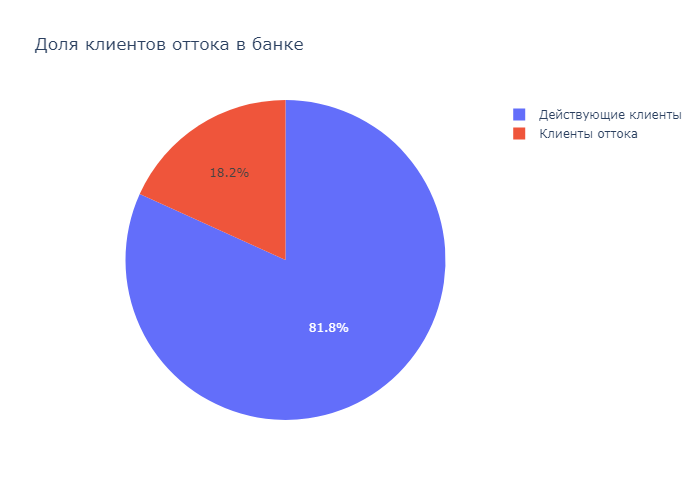

In [15]:
data_churn_0 = data.query ('churn == 0')
data_churn_1 = data.query ('churn == 1')

fig = px.pie (values = [len (data_churn_0), len (data_churn_1)],
              names = ['Действующие клиенты', 'Клиенты оттока'],
              title = 'Доля клиентов оттока в банке')
fig.show ('png')

Клиенты, уходящие в отток, составляют более 18% - это критичное для бизнеса значение.

Напишем функцию для построения распределения количественных небинарных признаков вместе с диаграммой разамаха по данным.

In [16]:
def show_hist_and_box (column, data_1, data_2, data_3, n_bins = 0, range_value = []):
    
    fig_1 = go.Figure()
    
    for i, j in zip ([data_1, data_2], ['Действующие клиенты', 'Клиенты оттока']):

        fig_1.add_trace (go.Histogram (x = i [column],
                                       name = j,
                                       histnorm = 'probability density',
                                       nbinsx = n_bins))
    
    fig_1.update_layout (barmode = 'overlay',
                         title_text = f'Распределение действующих и отточных клиентов по признаку {column}',
                         height = 600,
                         width = 1000)
    
    fig_1.update_traces (opacity = 0.5)
    
    if len (range_value) == 0:
        fig_2 = px.box (data_3,
                        x = 'churn',
                        y = column,
                        title = f'Диаграмма размаха действующих и отточных клиентов по признаку {column}',
                        height = 600,
                        width = 1000)
        
        fig_1.show ('png')
        fig_2.show ('png')
        
    else:
        fig_1.update_xaxes (range = range_value)
        fig_1.show ('png')

Посмотрим на распределение по признаку `score` - баллы кредитного скоринга.

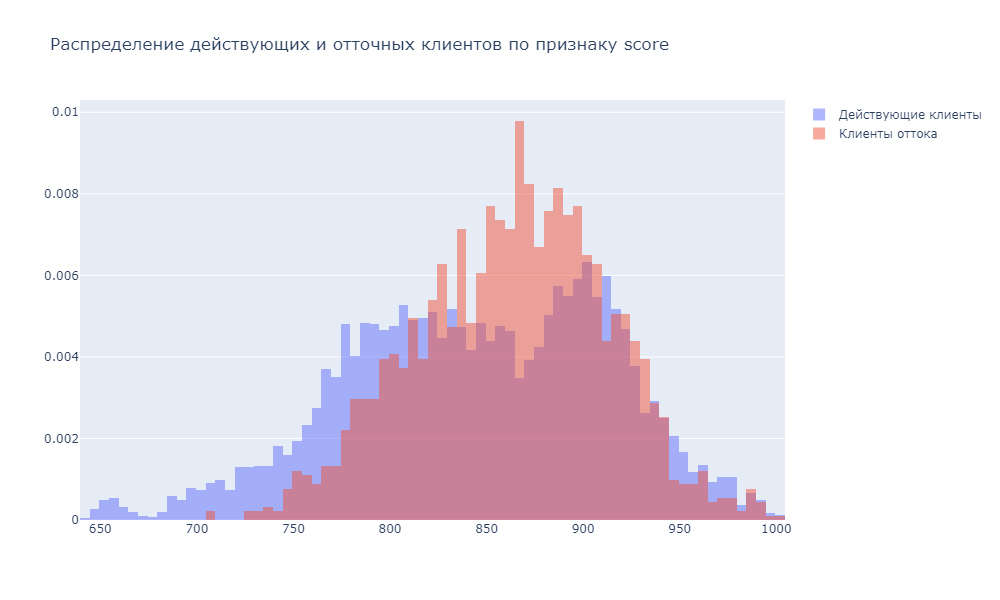

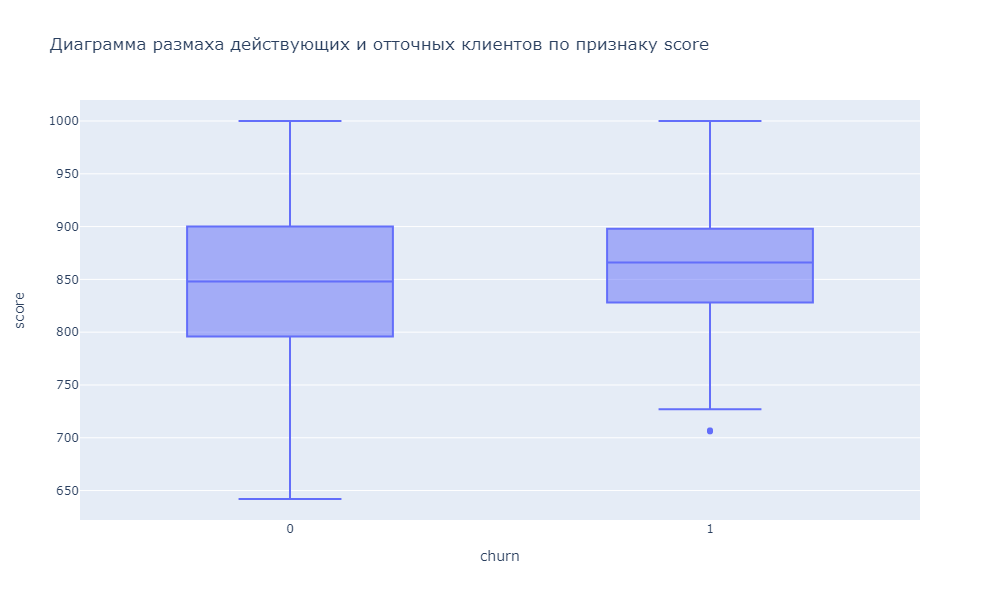

In [17]:
show_hist_and_box ('score', data_churn_0, data_churn_1, data)

По графику распределения баллов кредитного скоринга видно, что для отточных клиентов пиковые значения приходятся на диапозон  - от 820 до 909. При этом медианные значения у отточных клиентов выше на 18 баллов (примерно на 2%) из-за разницы в минимальных значениях у двух групп.

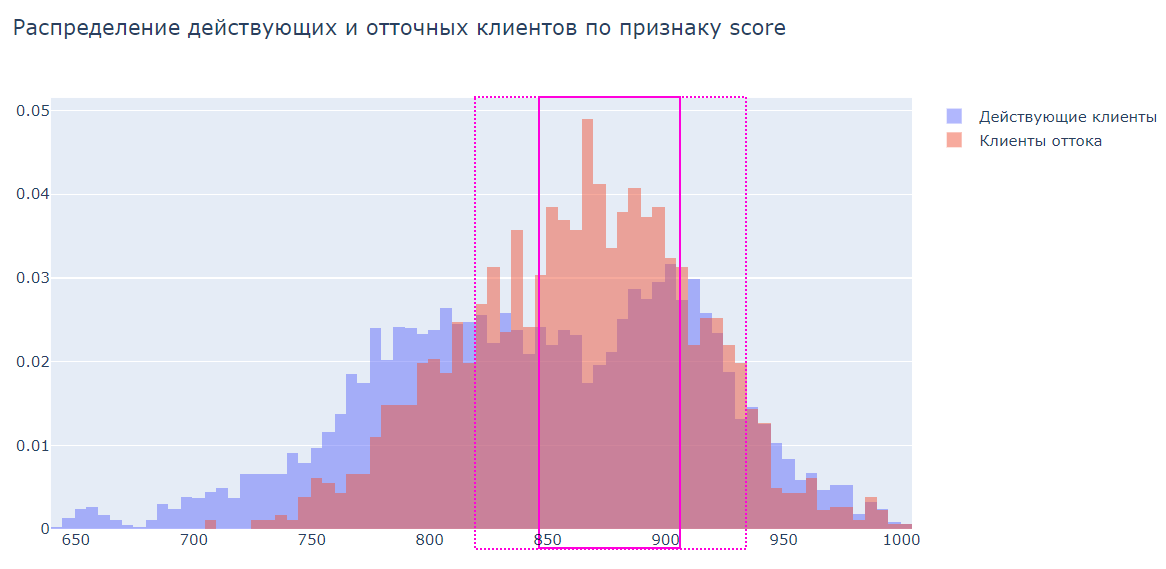

Посмотрим на распределение по признаку `age` - возраст.

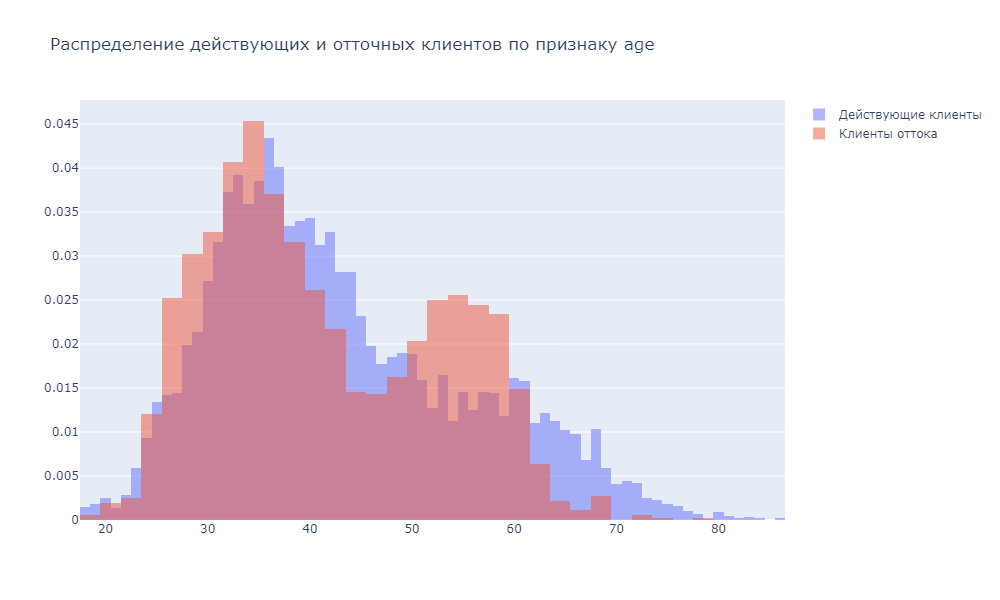

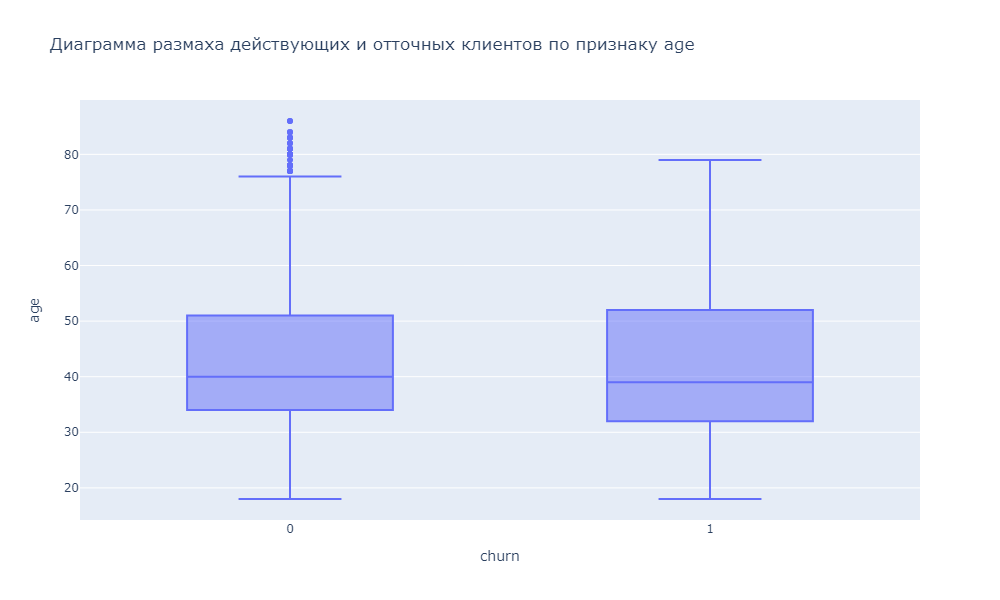

In [18]:
show_hist_and_box ('age', data_churn_0, data_churn_1, data)

Распределение возрастных категорий показывает пиковые значения в диапазоне от 25 до 35 лет, а также от 50 до 60 лет. При этом медианные значения возрастов у обеих групп практически не отличаются.

Посмотрим на распределение по признакам `equity` и `products`.

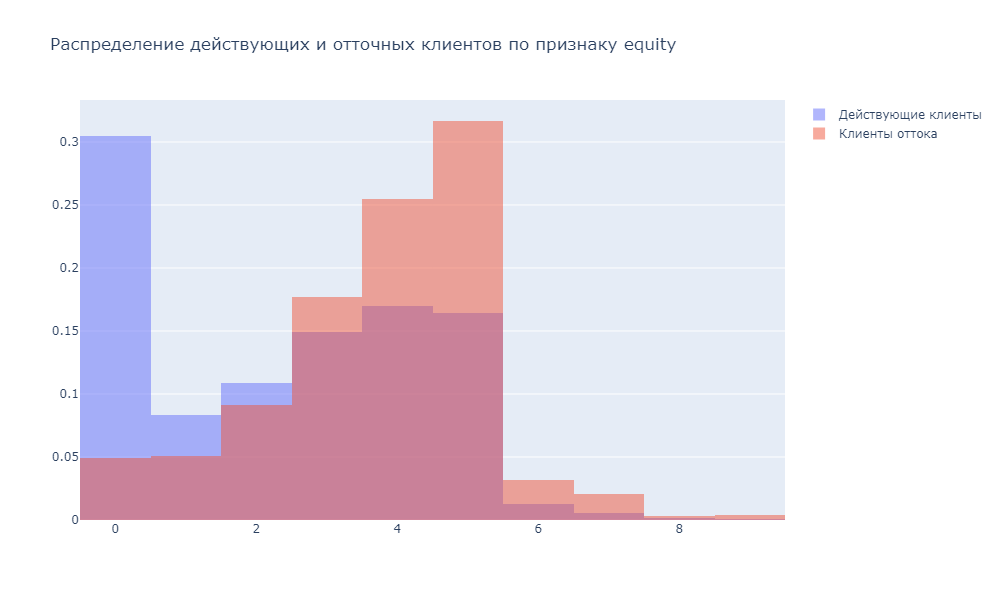

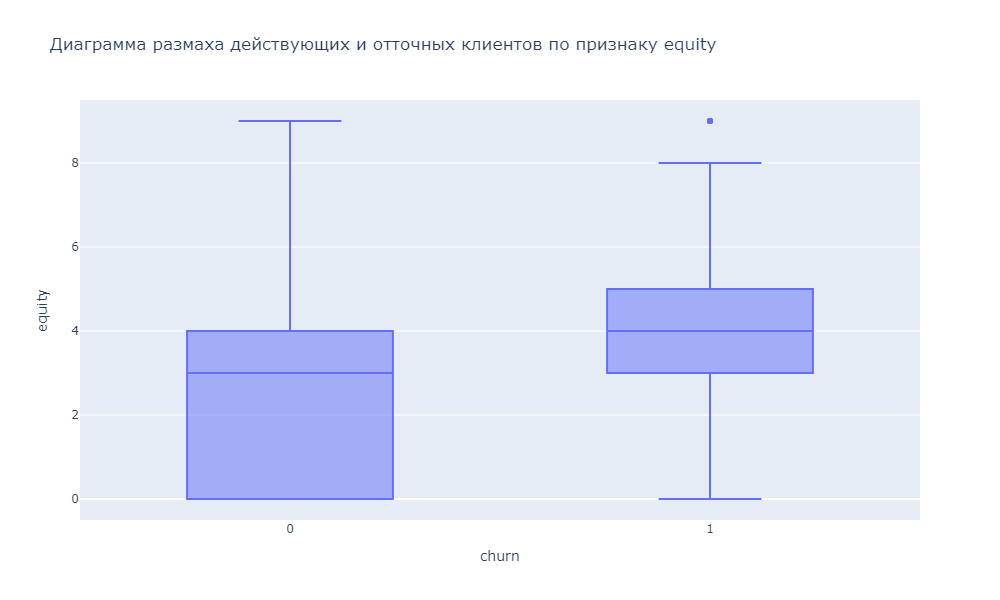

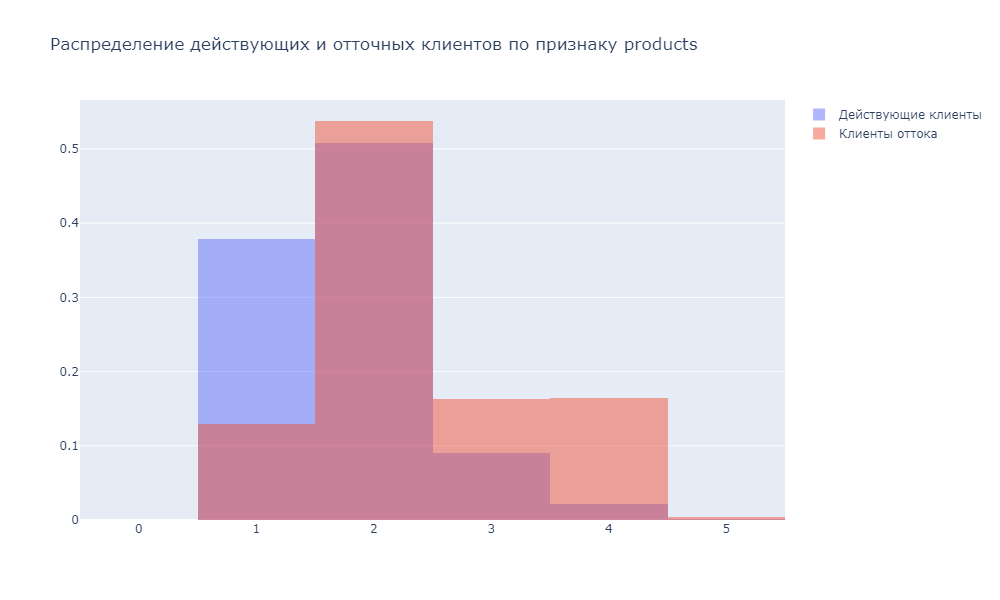

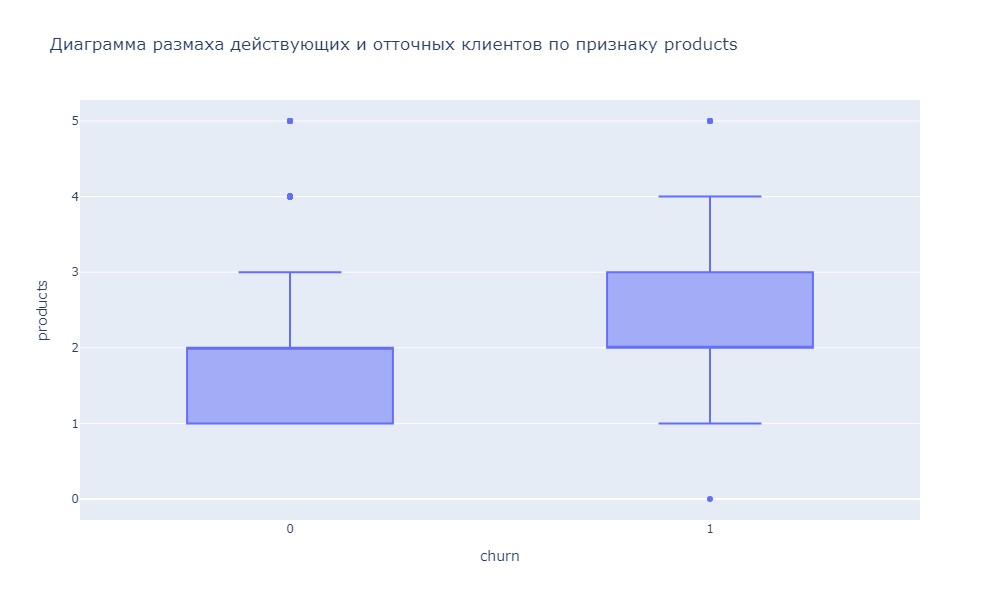

In [19]:
for i in ['equity', 'products']:
    show_hist_and_box (i, data_churn_0, data_churn_1, data)

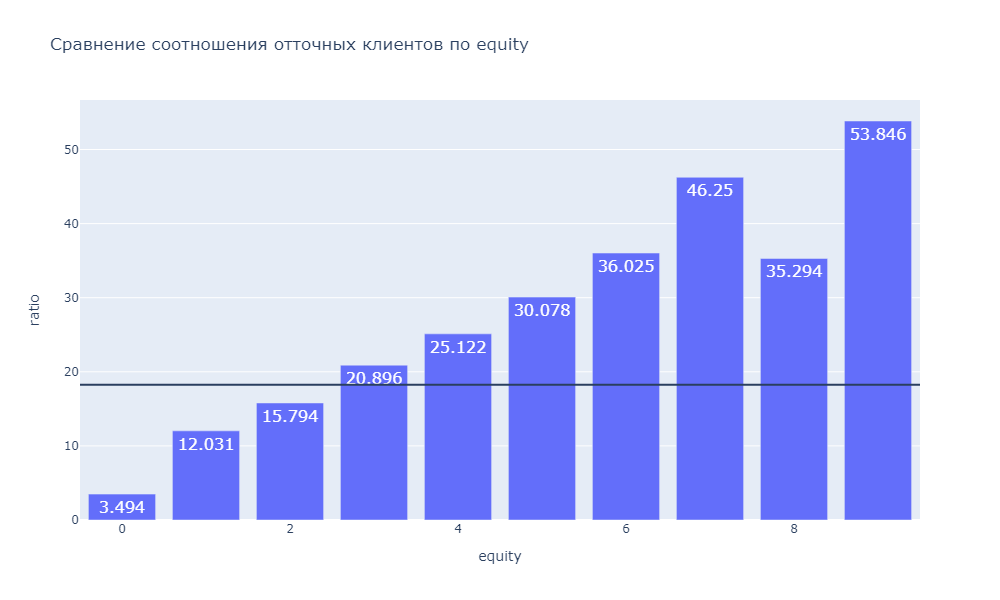

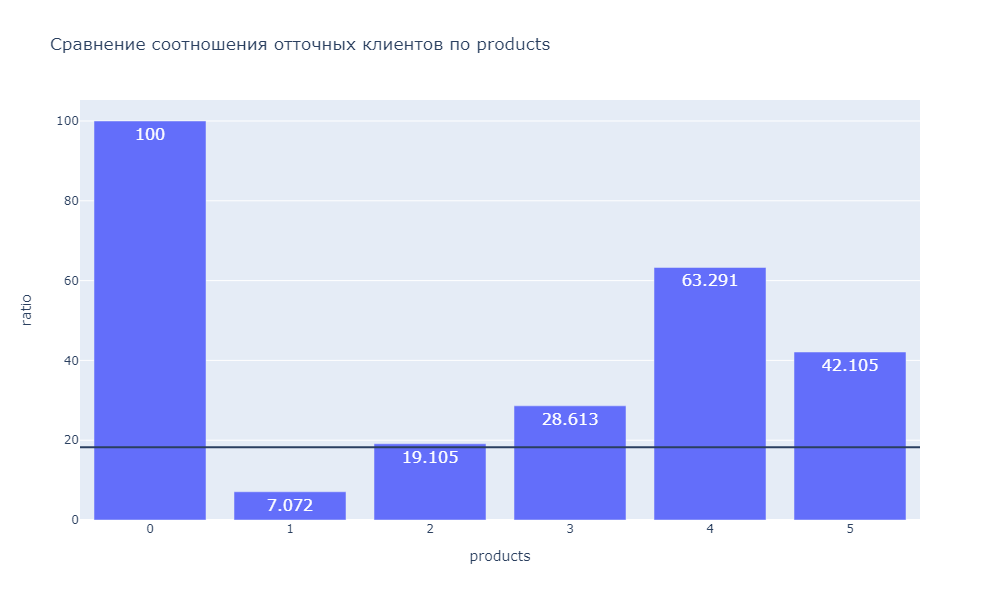

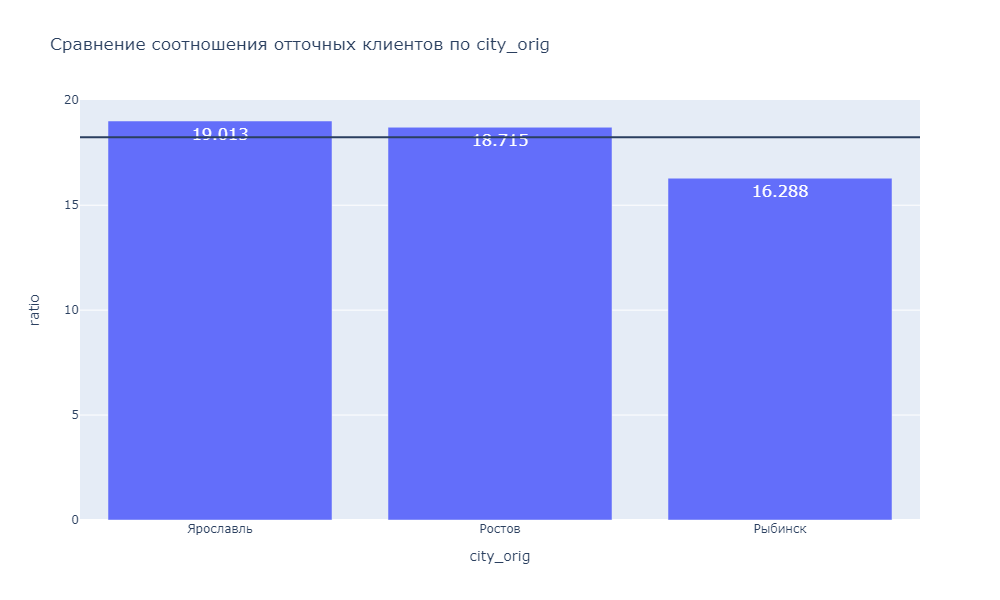

In [20]:
for i in ['equity', 'products', 'city_orig']:
    groupby_show (data_churn_1, i, 'Сравнение соотношения отточных клиентов по ')

Распределение по признаку `equity` выявило наличие очень большого количества действующих клиентов с нулевым показателем данного признака, в то время как отточные клиенты примерно одинаково распределены между значениями "0" и "1". Мединное количество баллов собственности у действующих клиентов - 3, у отточных - 4. Соотношение отточных клиентов, имеющих 3 и более продуктов, выше среднего соотношения отточных клиентов по банку. Максимальное распределение оттоковых клиентов - среди значений 7 и 9 - это говорит о потенциальной платёжеспособности отточных клиентов и соответственно, их ценности для банка. В обеих группах количество клиентов, имеющих более 5 баллов собственности, резко уменьшается.

Распределение по признаку `products` показало, что плотность отточных клиентов, имеющих 3, 4 и 5 продуктов, превышает плотность клиентов той же категории среди действующих клиентов. Это также подчёркивает высокую ценность клиентов, которые уходят в отток. 100% клиентов, не имеющих продуктов банка, относятся к отточным, однако их количество незначительно. Медианное значение у обеих групп одинаковое - 2 продукта.

Разница в соотношении клиентов по городам минимальна (2,7%).

Посмотрим на распределение по признаку `balance` - баланс на счёте. Поскольку данный признак имеет большое количество выбросов, распределение будем строить по значениям баланса менее 5 млн. руб.

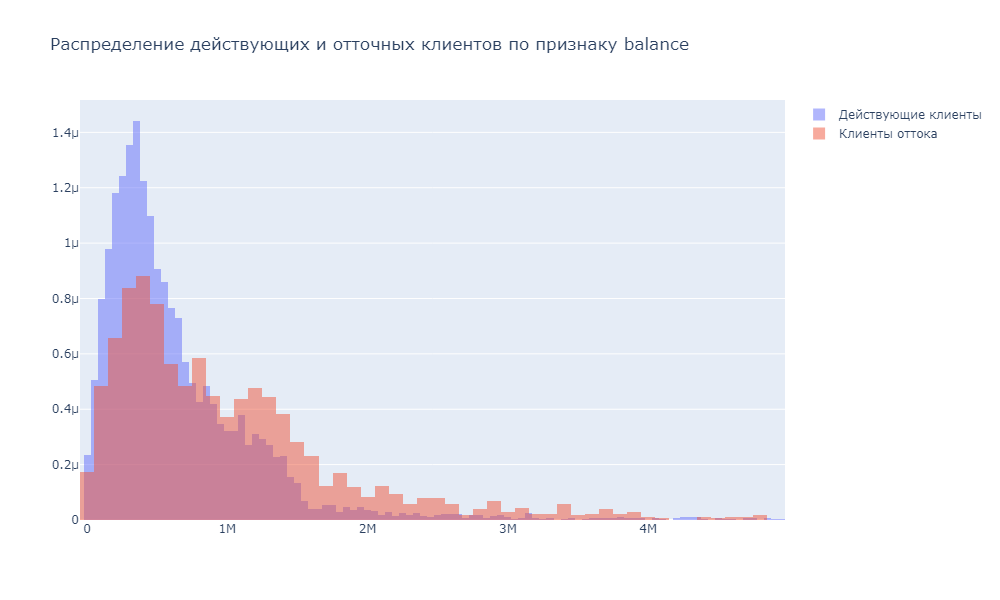

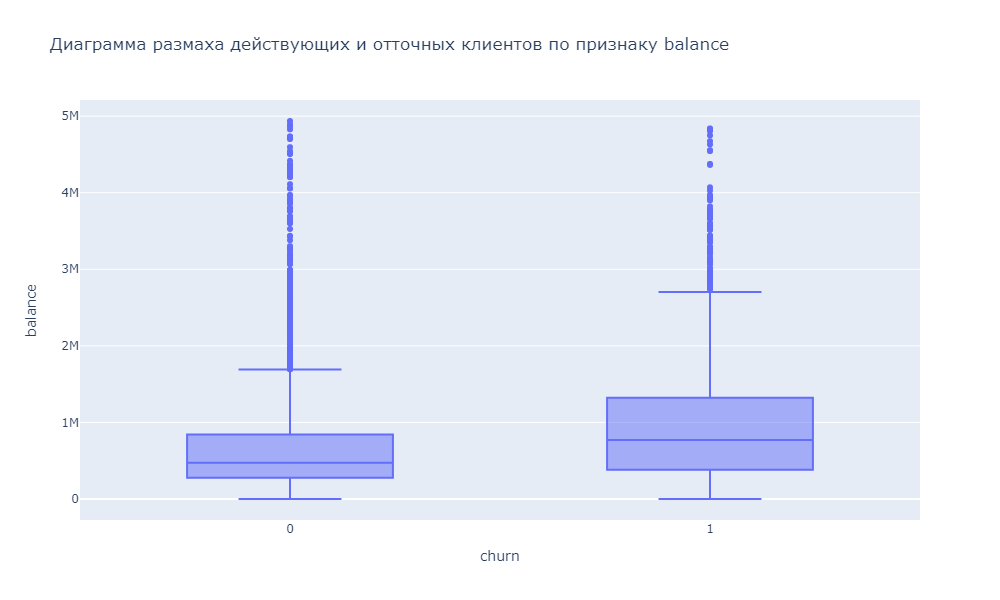

In [21]:
show_hist_and_box ('balance',
                   data_churn_0.query ('balance < 5000000'),
                   data_churn_1.query ('balance < 5000000'),
                   data.query ('balance < 5000000'))

Распределение по срезу данных с балансом менее 5 млн. руб. позволяет увидеть отличие в размерах плотности клиентов оттока для клиентов с баланом от 750 тыс. руб. Среди отточных клиентов оказалось большое количество клиентов с высоким достатком. Диаграмма размаха также показывает разницу в медианных значениях: 472 тыс. руб - для действующих клиентов, и 771 тыс. - для отточных клиентов. Разница между медианами составляет более 61% - это очень значимое отличие.

Посмотрим на распределение по признаку `est_salary` - заработная плата клиента. Из-за наличия выбросов распределение будем строить по значениям зарплаты до 500000 тыс.

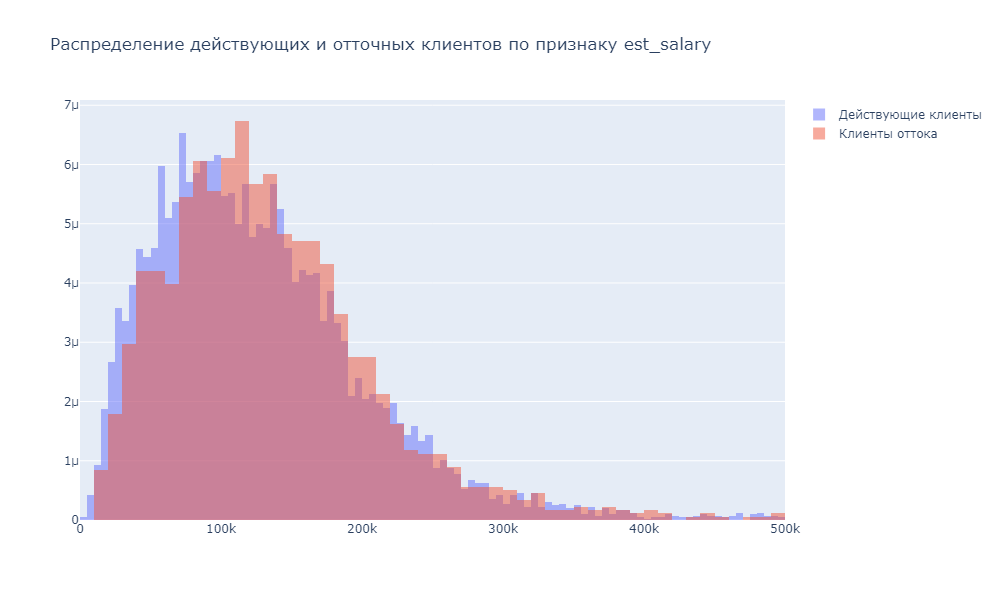

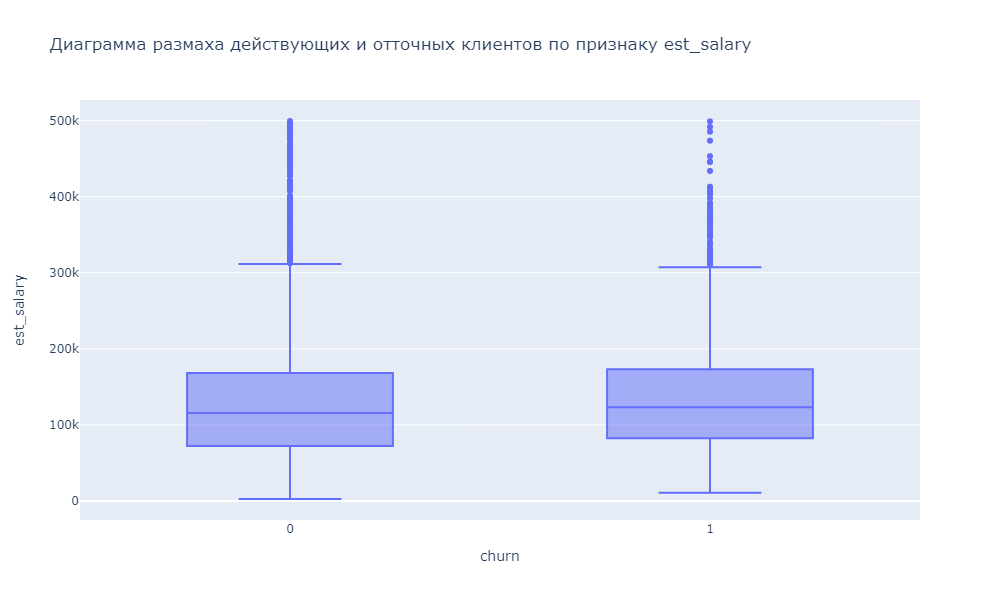

In [22]:
show_hist_and_box ('est_salary',
                   data_churn_0.query ('est_salary < 500000'),
                   data_churn_1.query ('est_salary < 500000'),
                   data.query ('est_salary < 500000'))

Признак `salary` отличается по распределению плотности для клиентов с зарплатой от 100 до 220 тыс.руб. Медианные значения у группы с клиентами оттока также выше в среднем на 8 тыс. Посмотрим на распределение со значением зарплаты от 500000 тыс.

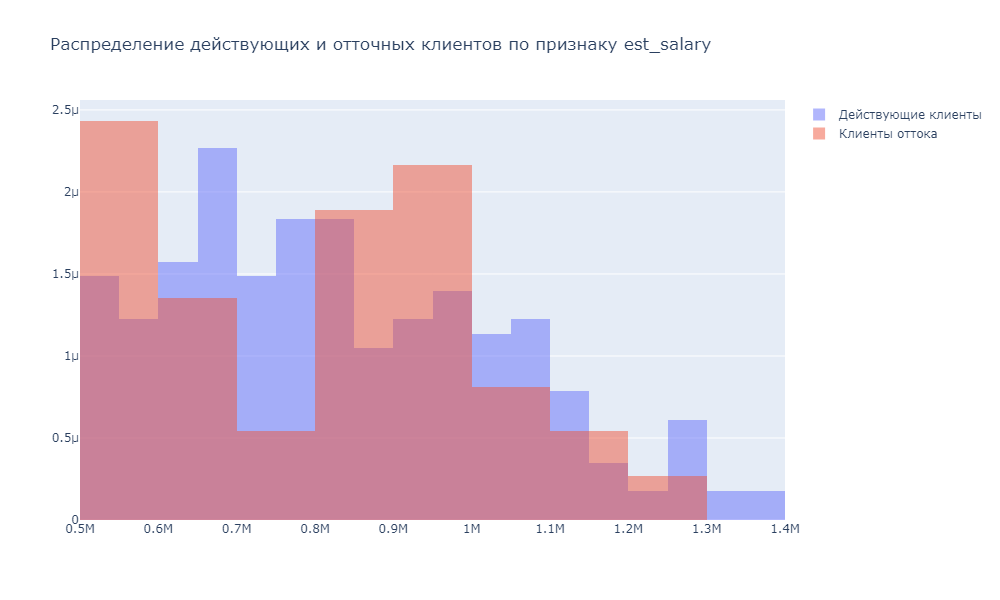

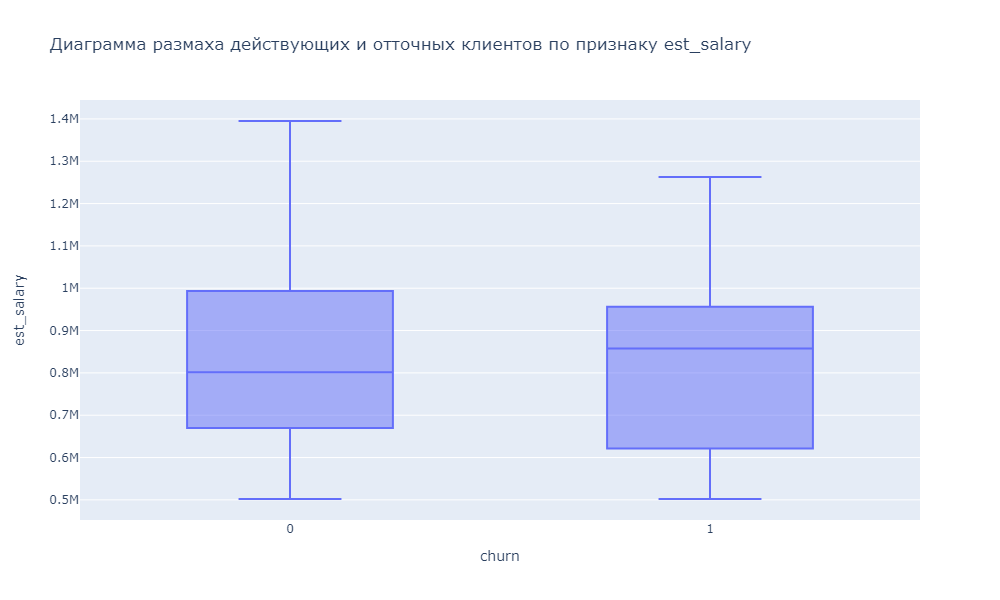

In [23]:
show_hist_and_box ('est_salary',
                   data_churn_0.query ('est_salary > 500000'),
                   data_churn_1.query ('est_salary > 500000'),
                   data.query ('est_salary > 500000'))

Распеределение показывает пиковые зоны плотности клиентов оттока в диапазонах 500-600 тыс.руб. и 800 тыс. - 1 млн. руб. Медианные значения клиентов отточных клиентов с зарплатой от 500000 тыс примерно на 7% выше по сравнению с той же категорией действующих клиентов.

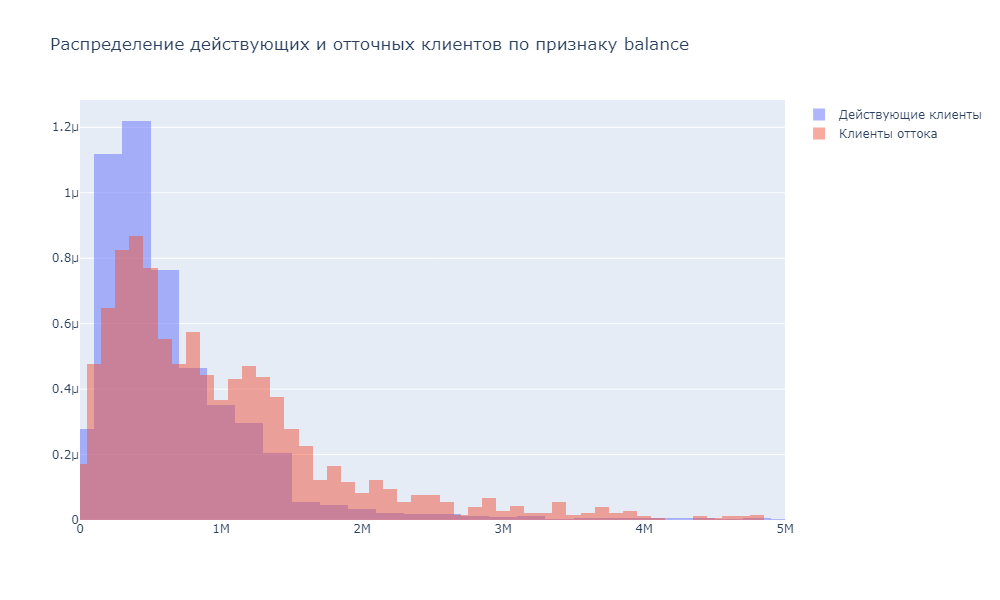

In [24]:
show_hist_and_box ('balance', data_churn_0, data_churn_1, data, 1000, [0, 5000000])

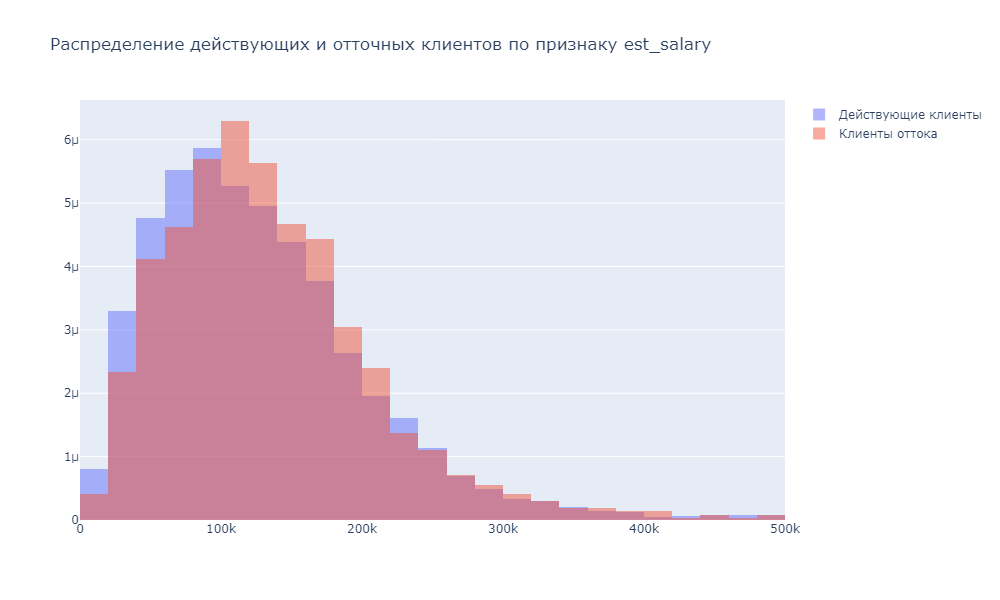

In [25]:
show_hist_and_box ('est_salary', data_churn_0, data_churn_1, data, 100 , [0, 500000])

Сравним количественные бинарные признаки, такие как `gender_orig`, `credit_card` и `last_activity`.

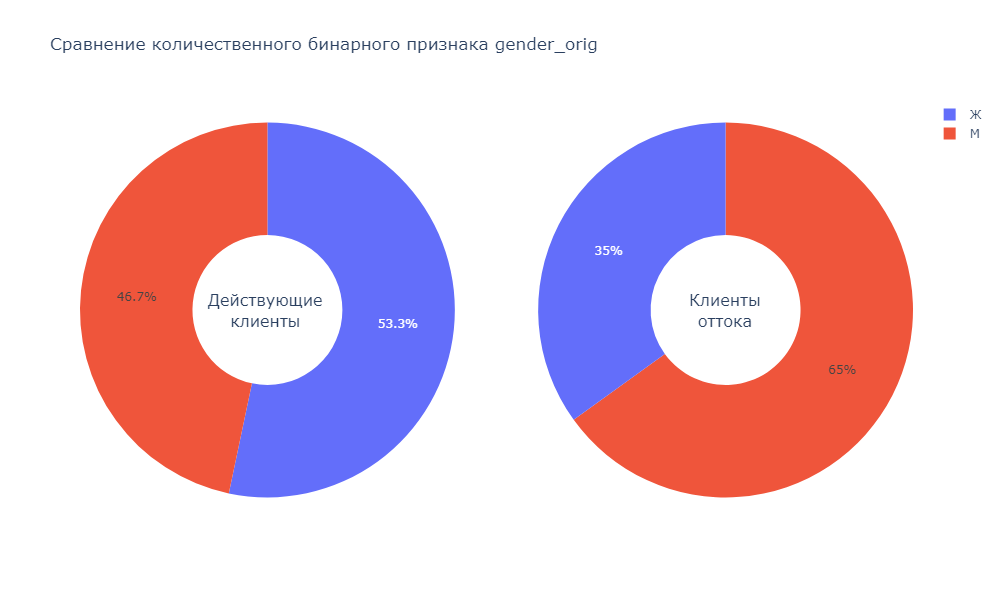

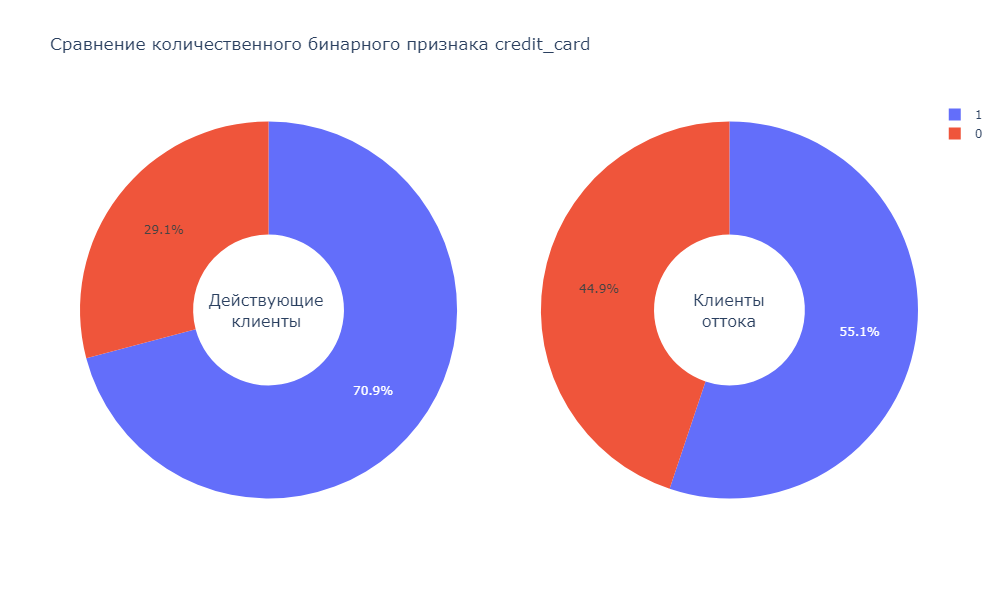

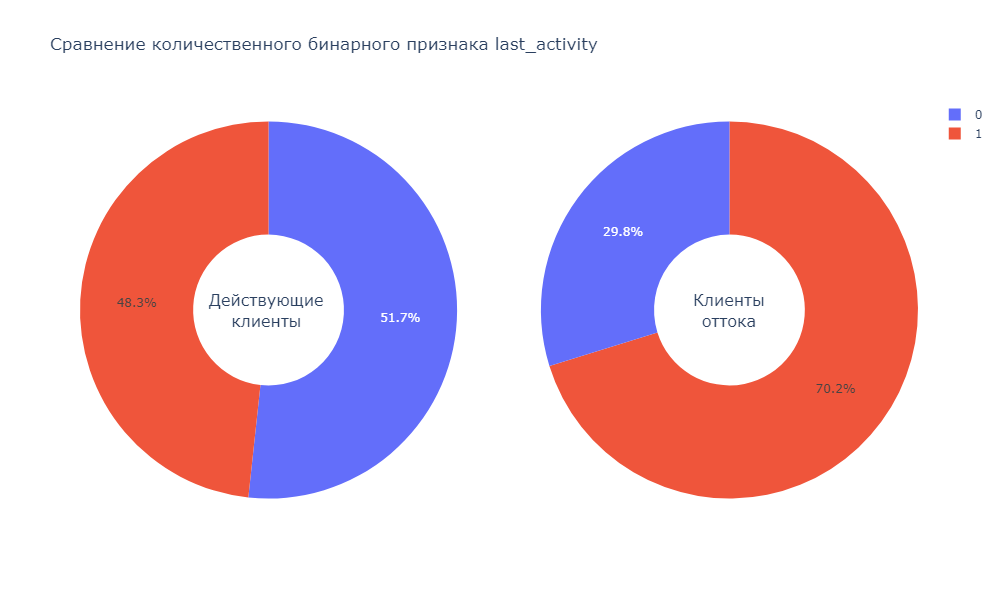

In [26]:
for i in ['gender_orig', 'credit_card', 'last_activity']:
    show_binary_pie (data_churn_0, data_churn_1, i, 'Действующие<br>клиенты', 'Клиенты<br>оттока')

Среди оттоковых клиентов 65% - мужчины, 35 - женщины, однако, в данных по действующим клиентам распределение гендерной принадлежности более равномерно.

Среди действующих клиентов 70% имеют кредитные карты, среди оттоковых их показатель ниже, но не критично.

Клиенты оттока оказались более активными за последний месяц по сравнению с действующими клиентами. Это можно объяснить необходимостью клиента закрыть счёт, вывести средства, обратиться в банк с вопросом о прекращении сотрудничества и прочее.

### Поиск взаимосвязей. Корреляционный анализ данных
Построим тепловую карту по матрице корреляций основного датасета.

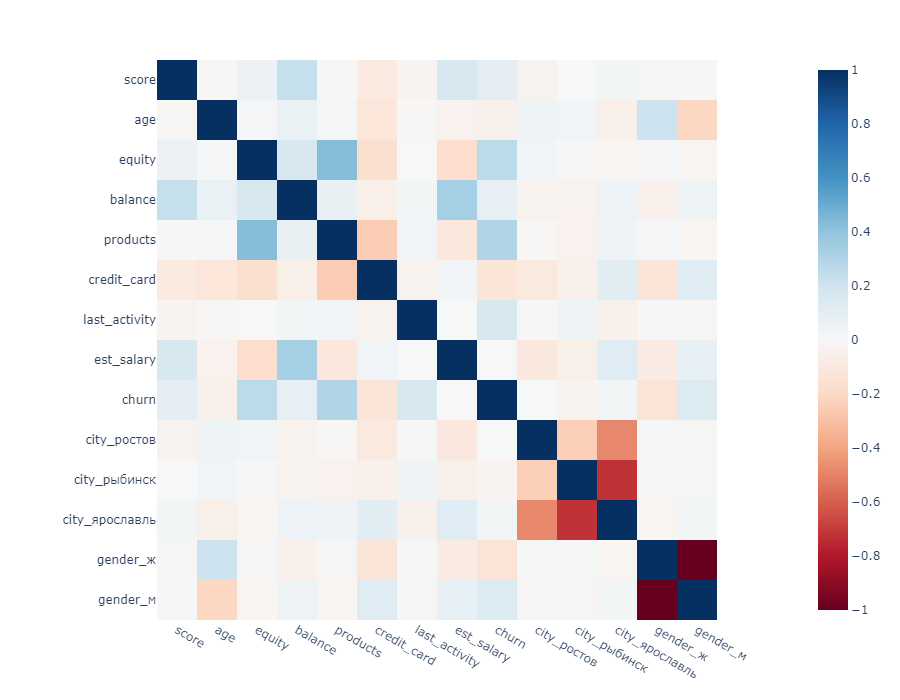

In [27]:
fig = px.imshow (data.drop ('user_id', axis = 1).corr(),
                 color_continuous_scale = px.colors.sequential.RdBu,
                 width = 900,
                 height = 700)
fig.show ('png')

По графику можно увидеть небольшую зависимость признаков `products` и `equity` (k = 0.43), а также `balance` и `est_salary` (k = 0.34).

Корреляция признака `churn` со всеми признаками, кроме `products` по шкале Чеддока слабая. Наиболее сильные зависимости - с признаками `equity` (k = 0.27) и `products`(k = 0.3, умеренная корреляция).

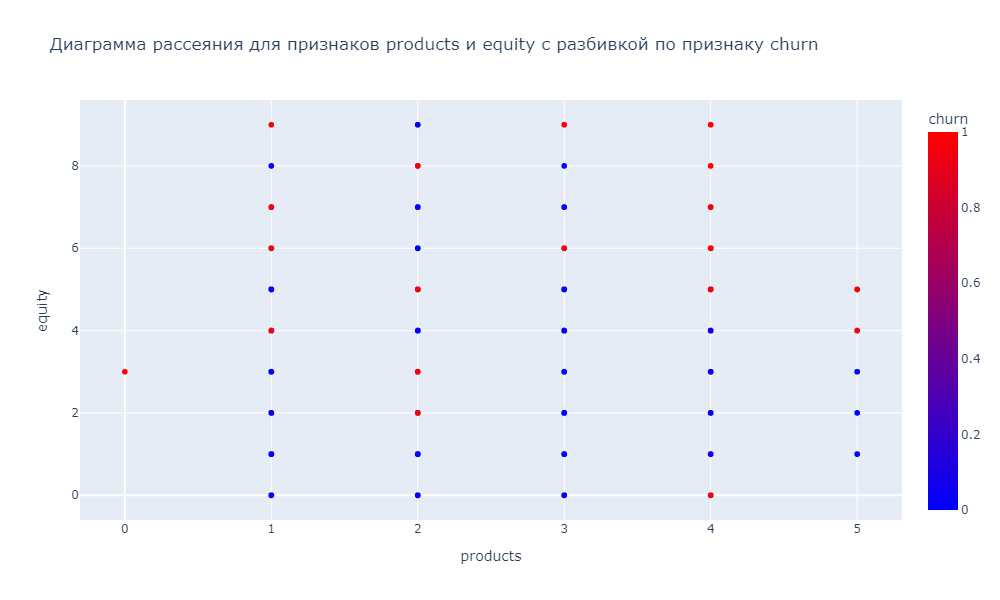

In [28]:
fig = px.scatter (data,
                  x = 'products',
                  y = 'equity',
                  color = 'churn',
                  title = 'Диаграмма рассеяния для признаков products и equity с разбивкой по признаку churn',
                  color_continuous_scale = px.colors.sequential.Bluered,
                  height = 600,
                  width = 1000)
fig.show ('png')

### Составление портретов клиентов

Анализ количественных и качественных показателей вместе с корреляционным анализом позволил составить следующие портреты клиентов:

**Действующие клиенты**

* Около 53% действующих клиентов - женщины, 47% - мужчины
* Средний диапазон возраста клиентов от 34 до 51 года
* 71% киентов имеют кредитную карту, 29% - обходятся без неё
* Максимальная концентрация значений кредитного скоринга - в диапазоне 796-900 баллов. Медианное значение - 848 баллов
* Медианное значение количества баллов собственности - 3 балла
* Медианное значение количества продуктов - 2. Количество отточных клиентов, имеющих 3 продукта, на 83% меньше количества отточных клиентов, у которых количество продуктов совпадает с медианным
* В среднем баланс на счёте клиентов в разрезе до 5 млн.руб. находится в диапазоне 277-848 тыс.руб., медианное значение - 472 тыс.руб.
* В среднем зарплата клиентов в разрезе до 500 тыс. руб. находится в диапазоне 72-168 тыс. руб., медианное значение - 115 тыс.руб. Зарплата клиентов в разрезе от 500 тыс. руб. находится в диапазоне 669-999 тыс. руб., медианное значение - 801 тыс.руб
* Более 51% клиентов проявляли активность за последний месяц

**Клиенты оттока**

* 35% отточных клиентов - женщины, 65% - мужчины
* Средний диапазон возраста клиентов от 25 до 30 и от 50 до 60 года
* 55% киентов имеют кредитную карту, 45% - обходятся без неё
* Максимальная концентрация значений кредитного скоринга - в диапазоне 820-909 баллов. Медианное значение - 866 баллов
* Медианное значение количества баллов собственности - 4 балла
* Медианное значение количества продуктов - 2. Количество отточных клиентов, имеющих 3 продукта, примерно на 70% меньше количества отточных клиентов, у которых количество продуктов совпадает с медианным
* В среднем баланс на счёте клиентов в разрезе до 5 млн.руб. находится в диапазоне 383 тыс - 1,3 млн. руб., медианное значение - 771 тыс.руб.
* В среднем зарплата клиентов в разрезе до 500 тыс. руб. находится в диапазоне 82-173 тыс. руб., медианное значение - 123 тыс.руб. Зарплата клиентов в разрезе от 500 тыс. руб. находится в диапазоне 621-956 тыс. руб., медианное значение - 857 тыс.руб
* Более 70% клиентов проявляли активность за последний месяц
* Наибольший процент клиентов оттока - из Ярославля (19%), наименьший - из Рыбинска (16%).

**Сравнение портретов между двумя группами**

* Половой признак между двумя группами различается на 18% (мужчин на 18% больше, женщин меньше)
* Клиенты оттока на 16% реже имеют кредитные карты (по оценке медианных значений)
* Баллы кредитного скоринга в среднем на 2% выше у клиентов оттока (по оценке медианных значений)
* Баллы собственности между группами отличаются на 25% (4 балла - у отточных клиентов, 3 - у действующих)
* Медианное значение количества продуктов у обеих групп одинаковое - 2 продукта. Однако, количество отточных клиентов, имеющих 3 продукта, примерно на 70% меньше количества отточных клиентов, у которых количество продуктов совпадает с медианным, в то время, как у дейстующих клиентов эта разница составляет более 83%. При этом количество отточных клиентов, имеющих 4 продукта, превышает количество клиентов той же категории среди действующих клиентов.
* Медиана по балансу отточных клиентов в срезе до 5 млн. руб. выше на 38,7% по сравнению с медианой дейстующих клиентов того же среза
* Медиана по зарплате отточных клиентов в срезах до 500 тыс.руб.  и от 500 тыс.руб. примерно одинаково выше на 6,5% по сравнению с медианой дейстующих клиентов тех же срезов
* Активность клиентов оттока на 19% выше, чем у действующих клиентов

**Оценка отточных клиентов**

Можно предположить, что отточные клиенты являются крайне ценными для банка, т.к. имеют большее количество средств на счету, в среднем имеют более высокие доходы, а также имеют более высокую оценку баллов собственности, количество продуктов и проявляют более высокую активность по сравнению с действующими клиентами.

Наиболее коррелирующие с фактом оттока признаки - количество баллов собственности (equity) и количество продуктов, которыми пользуется клиент (products).

## Проверка статистических гипотез
### Гипотеза №1. Доходы клиентов, уходящих в отток, и клиентов, остающихся в банке, различаются

Нулевая гипотеза (H₀) формируется, используя знак равенства. Исходя из формулировки нулевой гипотезы можно сформировать альтернативную гипотезу (H₁) - утверждение, которое принимается верным при условии отвержения нулевой гипотезы.

Сформулируем первые нулевую и альтернативную гипотезы:

**H0:** Доходы клиентов, уходящих в отток, и клиентов, остающихся в банке, одинаковые

**H1:** Доходы клиентов, уходящих в отток, и клиентов, остающихся в банке, различаются

В данной гипотезе мы будем сравнивать две разные выборки, поэтому при проверке этой гипотезы воспользуемся методом `scipy.stats.ttest_ind`.

In [29]:
def len_and_var (data_1, data_2, column):
    for i, j in zip ([data_1, data_2], ['действующими', 'оттоковыми']):
        print (f'Размер выборки с {j} клиентами:', len (i))
        print (f'Дисперсия доходов в выборке с {j} клиентами:', round (i [column].agg (np.var), 1))
        print ()

len_and_var (data_churn_0, data_churn_1, 'est_salary')

Размер выборки с действующими клиентами: 8155
Дисперсия доходов в выборке с действующими клиентами: 20358839437.9

Размер выборки с оттоковыми клиентами: 1819
Дисперсия доходов в выборке с оттоковыми клиентами: 15112316536.4



Проверять гипотезу будем с помощью t-теста. Генеральные совокупности не должны зависеть друг от друга, а выборочные средние должны быть нормально распределены. Сравниваемые выборки отличаются как по размеру, так и по значению их дисперсии. Это следует учесть при использовании метода проверки (параметр `equal_var` установим со значением `False`). Поскольку в условии гипотезы указано однозначное условие её подтверждения, установим допустимое пороговое значение `alpha = 1`.

In [30]:
def ttest_result (data_1, data_2, equal_var, alpha):
    result = st.ttest_ind (data_1, data_2, equal_var = equal_var)
    print (f'p_value: {result.pvalue:.3}')
    if result.pvalue < alpha:
        print ('Отвергаем нулевую гипотезу')
    else:
        print ('НЕ отвергаем нулевую гипотезу')

ttest_result (data_churn_0 ['est_salary'], data_churn_1 ['est_salary'], False, .01)

p_value: 0.852
НЕ отвергаем нулевую гипотезу


T-критерий показал, что доходы клиентов в обеих выборках можно считать одинаковыми. Однако, показатель p-value близкок к 1, что говорит, о наличии разницы в доходах, которую мы не можем принять как статистически значимую.

Сравним результаты t-теста с результатами по u-критерию. Парметр `alt` применим со значением `two-sided`, т.к. мы сравниваем обе выборки между собой.

In [31]:
def utest_result (data_1, data_2, alpha, alt):
    result = st.mannwhitneyu (data_1, data_2, True, alt)
    print (f'p_value: {result.pvalue:.2}')
    if result.pvalue < alpha:
        print ('Отвергаем нулевую гипотезу')
    else:
        print ('НЕ отвергаем нулевую гипотезу')

utest_result (data_churn_0 ['est_salary'], data_churn_1 ['est_salary'], .01, 'two-sided')

p_value: 0.00019
Отвергаем нулевую гипотезу


U-критерий показал, что доходы клиентов в обеих выборках различаются. Причиной тому является разный подход к проверке гипотезы: t-критерий основывается на средних показателях выборок, а u-критерий на медианных значениях.

Учитывая то, что p-value при проведении t-теста близок к 1, а в данных о доходах имеется много выбросов, лучше ориентироаться на результаты u-критерия.

###  Гипотеза №2. Количество банковских продуктов у клиентов оттока и действующих клиентов совпадает

Сформулируем первые нулевую и альтернативную гипотезы:

**H0:** Количество банковских продуктов у клиентов оттока и действующих клиентов совпадает

**H1:** Количество банковских продуктов у клиентов оттока и действующих клиентов различается

В данной гипотезе мы будем сравнивать две разные выборки, поэтому при проверке этой гипотезы воспользуемся методом `scipy.stats.ttest_ind`.

In [32]:
len_and_var (data_churn_0, data_churn_1, 'products')

Размер выборки с действующими клиентами: 8155
Дисперсия доходов в выборке с действующими клиентами: 0.5

Размер выборки с оттоковыми клиентами: 1819
Дисперсия доходов в выборке с оттоковыми клиентами: 0.9



Проверять гипотезу будем с помощью t-теста.

In [33]:
ttest_result (data_churn_0 ['products'], data_churn_1 ['products'], False, .01)

p_value: 7.54e-138
Отвергаем нулевую гипотезу


T-тест позволил опровергнуть нулевую гипотезу. Количество банковских продуктов у клиентов оттока и действующих клиентов различается.

###  Гипотеза №3. Количество баллов собственности у клиентов оттока и действующих клиентов совпадает

Сформулируем первые нулевую и альтернативную гипотезы:

**H0:** Количество баллов собственности у клиентов оттока и действующих клиентов совпадает

**H1:** Количество баллов собственности у клиентов оттока и действующих клиентов различается

В данной гипотезе мы будем сравнивать две разные выборки, поэтому при проверке этой гипотезы воспользуемся методом `scipy.stats.ttest_ind`.

In [34]:
len_and_var (data_churn_0, data_churn_1, 'equity')

Размер выборки с действующими клиентами: 8155
Дисперсия доходов в выборке с действующими клиентами: 3.9

Размер выборки с оттоковыми клиентами: 1819
Дисперсия доходов в выборке с оттоковыми клиентами: 2.5



Проверять гипотезу будем с помощью t-теста.

In [35]:
ttest_result (data_churn_0 ['equity'], data_churn_1 ['equity'], False, .01)

p_value: 2.01e-196
Отвергаем нулевую гипотезу


T-тест позволил опровергнуть нулевую гипотезу. Количество баллов собственности у клиентов оттока и действующих клиентов различается.

## Сегментация клиентов
### Определение сегментов на основе стратегических показателей

В рамках исследовательского анализа данных и проверки статистических гипотез мы выявили наиболее важные признаки, влияющие на отток клиентов. Имея результаты исследования, выделим несколько сегментов клиентов, склонных к уходу в отток в той или иной степени. В качестве приемлемого для сегментов значения оттока будем считать значения, превышающие общую долю клиентов оттока в датасете хотя бы в 2 раза (> 36,4%).

Наиболее значимые признаки: возраст `age` (от 30 до 40 и от 52 до 60), количество продуктов `products` (> 2), баллы собственности `equity` (> 4), остаток на счёте `balance` (от 1 до 5 млн), баллы кредитного скоринга (от 820 до 909).

Помимо заранее установленных диапазонов значений у признаков, в сегментации будут принимать участие менее коррелирующие параметры, такие как пол `gender_orig` и активность за последний месяц `last_activity`, т.к. в зависимости от сегмента, данные признаки помогают сократить размер сегмента и увеличить долю оттока.

Напишем функцию для определения размера сегмента и отображения доли клиентов оттока в сегменте.

In [36]:
def show_segment_pie (segment, seg_num):
    
    len_seg = len (segment)
    fig = px.pie (values = [len (segment.query ('churn == 0')), len (segment.query ('churn == 1'))],
                  names = ['Действующие клиенты', 'Клиенты оттока'],
                  title = f'Размер сегмента {seg_num}: {len_seg}')
    fig.show ('png')

**Определим первый сегмент:** Клиенты мужского пола, имеющие более двух продуктов.

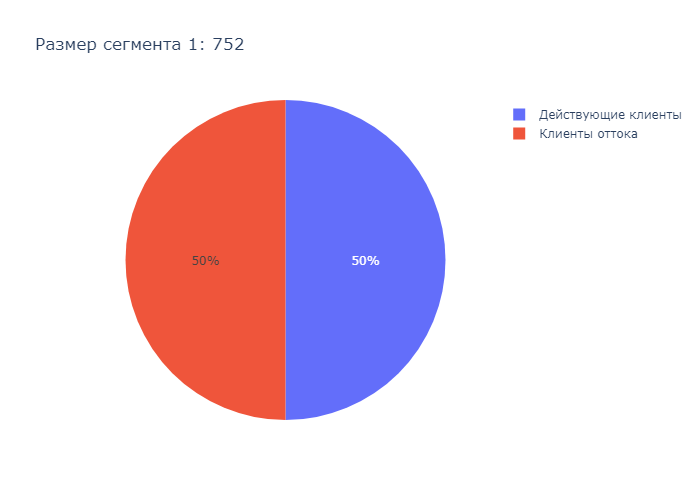

In [37]:
seg_1 = data.query ('gender_orig == "М" & products > 2')
show_segment_pie (seg_1, '1')

**Определим второй сегмент:** Клиенты имеющие более 4 баллов собственности, проявляющие активность за последний месяц.

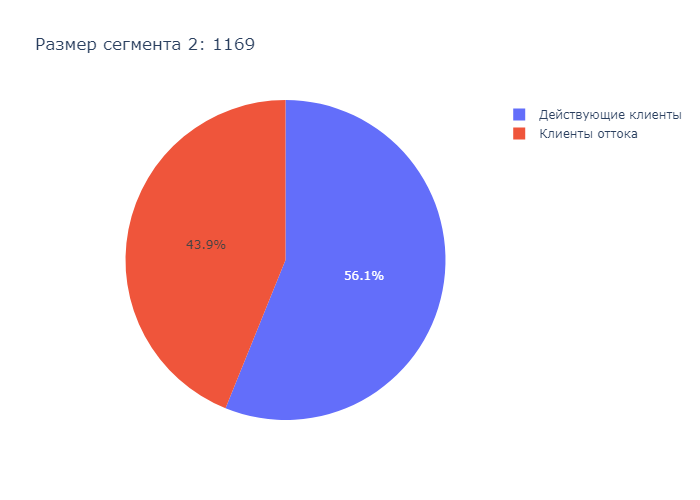

In [38]:
seg_2 = data.query ('equity > 4 & last_activity == 1')
show_segment_pie (seg_2, '2')

**Определим третий сегмент:** Клиенты имеющие от 1 до 5 млн.руб. на счетах, проявляющие активность за последний месяц.

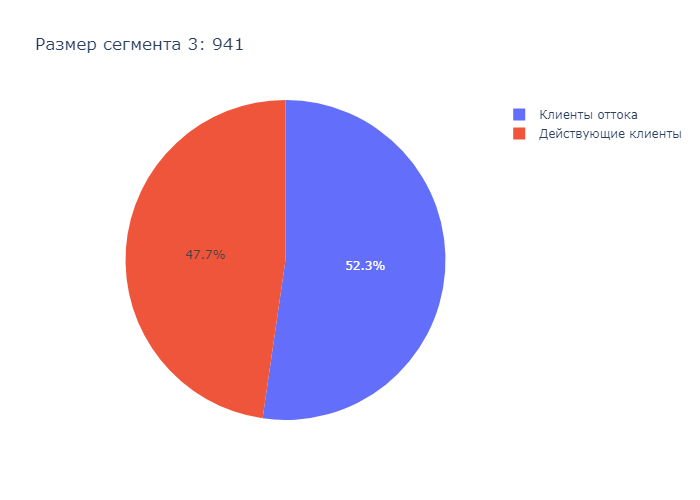

In [39]:
seg_3 = data.query ('1000000 < balance < 5000000 & last_activity == 1')
show_segment_pie (seg_3, '3')

**Определим четвёртый сегмент:** Клиенты мужского пола в возрастных диапазонах 25-30 и 50-60 лет, имеющие 820-909 баллов скоринга, проявляющие активность за последний месяц.

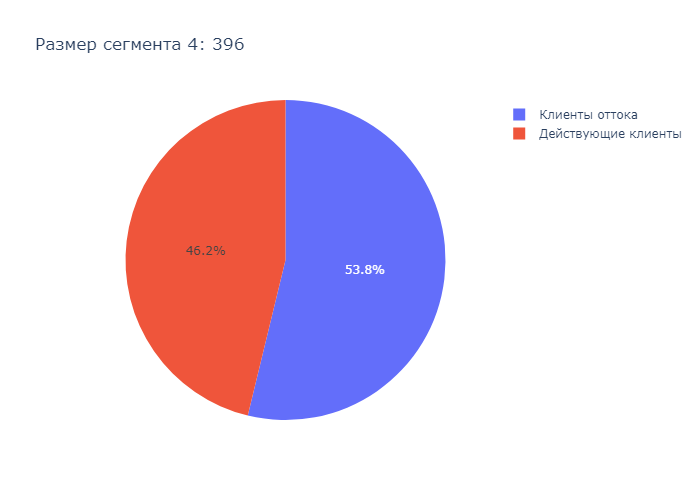

In [40]:
seg_4 = data.query ('gender_orig == "М" & (25 <= age <= 30 or 50 <= age <= 60) & 820 <= score <= 909 & last_activity == 1')
show_segment_pie (seg_4, '4')

Таким образом, мы сегментировали отточных клиентов, выделив наиболее важные признаки, влияющие на отток.

### Приоритизация сегментов

Приоритизацию сегментов будем проводить исходя из доли клиентов оттока.

**Сегмент №3** является наиболее приоритетным. Размер сегмента - 941 клиент с уровнем оттока выше 52%. Клиенты, имеющие от 1 до 5 млн.руб. на счетах и проявляющие активность за последний месяц. Это довольно большая выборка клиентов с балансом выше среднего. Отток клиентов из данного сегмента - это закрытие довольно крупных счетов. Можно увеличить процент на остаток по счёту для удержания клиентов, либо разработать тариф с премиальными условиями для клиентов с суммой счёта от 1 млн.руб. Стоит также обратить внимание на качество технической поддержки для таких клиентов, наладить обратную связь и скорость обработки запросов.

**Сегмент №1** В него входят клиенты мужского пола, имеющие более двух продуктов. Размер сегмента - 752 клиента. Уровень оттока в данном сегменте - 50%. Количество продуктов, которыми пользуются клиенты данного сегмента, превышает медианное значение. Это означает повышенный спрос на услуги банка. Вероятно, данные клиенты уже имеют открытые вклады, накопительные счета или инвестиционные портфели, однако, по какой-то причине их не устраивают условия обслуживания их счетов. Для выявления наиболее вероятной причины оттока в данном сегменте, необходимо провести анализ популярности действующих продуктов и распределения по ним. Для вкладов и накопительных счетов - рассмотреть возможность повышения процентной ставки и введения индивидуальных условий обслуживания для наиболее ценных клиентов в данном сегменте. Для инвесторов и трейдеров - рассмотреть возможность корректировки текущих тарифов, снижения комиссий при покупке\продаже ценных бумаг, а также при выводе средств. Для клиентов, имеющих кредитные счета - пересмотреть условия погашения кредита, например, рассмотреть возможность продления беспроцентного периода.

**Сегмент №2** - наименее отточный сегмент. В данный сегмент попадают клиенты, имеющие более 4 баллов собственности, проявляющие активность за последний месяц. Размер сегмента - 1169 клиента. Уровень оттока в данном сегменте превышает 43,9%. Клиенты данного сегмента, вероятнее всего, имеют большие накопления и желание их сохранить. Вероятнее всего, для клиентов данного сегмента менее интересны предложения кредитных счетов, и более интересны способы сохранения и приумножения капитала. Основная задача банка для удержания данных клиентов - повышение уровня доверия и лояльности к продуктам банка. В первую очередь - предложение индивидуальных условий при открытии долгосрочных вкладов и брокерских счетов.

**Сегмент №4** - самый маленький сегмент по размеру. В него входят клиенты мужского пола в возрастных диапазонах 25-30 и 50-60 лет, имеющие 820-909 баллов скоринга, проявляющие активность за последний месяц. Размер сегмента - 396 клиентов, с уровнем оттока 53,8%. Вероятнее всего, данные клиенты активно пользуются кедитованием и нуждаются в более лояльных условиях взятия и погашения кредита. Стоит оценить предложения конкурентов по предоставлению кредитов и скорректировать текущие тарифы.

 ## Общие выводы

В ходе исследования было решено оставить пропущенные значения в колонке `balance` без заполнения, т.к. не было выявлено прямой корреляции пропусков с каким-либо признаком.

Общий процент оттока клиентов в банке превышает 18% - это критичное значение. В ходе анализа были составлены портреты действующих и отточных клиентов, а также приведены их сравнительные характеристики. Корреляционный анализ позволил выявить наличие взаимосвязи количества продуктов и баллов собственности с фактом ухода клиента в отток. Это также бло подтверждено проверкой статистических гипотез.

На основании полученных результатов исследования, для выявления более целевых групп оттока, было проведено сегментирование клиентов. Наиболее отточные сегменты - №1 и №2 с общей долей оттока выше 50%, менее приоритетные, но также важные сегменты - №3 и №4 с общей долей оттока 47% и 37%, соответсвенно.

Сегментация и приоритезация клиентов позволила охарактеризовать клиентов и сформулировать рекомендации к каждому сегменту.